# Part A (Analysis of the Given Dataset)

Dataset Description: Titanic Dataset

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard 
6.	'Parch':  parents/children aboard 
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv)

\\
The training set should be used to build your machine-learning models. 

The test set should be used to see how well your model performs on unseen data.







## 1. Provide an overview of the given Dataset including the Dataset Characteristics and Exploratory Data Analysis, data preprocessing and performance of different ML models. This section should be written after completing Part A. 

**Write Here**

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable (hints: heatmap, groupby, etc) with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need). Note, we will be watching for copy-paste here.

### 2.1 Load, view data and show analysis on data. Be creative. Investigate like a detective.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
gender_data = pd.read_csv("gender_submission.csv")


In [ ]:
#Finding the unique data 
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [ ]:
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [ ]:
gender_data.nunique()

PassengerId    418
Survived         2
dtype: int64

In [ ]:
gender_data.info()
gender_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000

In [ ]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())


'Train Data:'

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

'Test Data:'

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

'Gender Data:'

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [3]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [4]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'

df = pd.concat([train_data, gender_test],axis = 0 )
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [ ]:
#Show all column names
# Code Here
list (df.columns.values.tolist())

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
# Code Here
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [ ]:
# Count rows and coulums
# Code Here
print(df.shape)
print(len(df.axes[0]))
print(len(df.axes[1]))

(1309, 12)
1309
12


In [ ]:
# Total cells in the dataset
# Code Here
df.count()

PassengerId    1309
Survived       1309
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64

In [ ]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 1309, dtype: bool


In [94]:
df.skew()

<ipython-input-94-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


PassengerId    0.000000
Survived       0.506478
Pclass        -0.598647
Age            0.390121
SibSp          3.844220
Parch          3.669078
Fare           4.367709
Age_Filled     0.390121
dtype: float64

### 2.2 Data Cleaning









#### Identifying duplicate values


In [5]:
duplicate_Survived = df.pivot_table(columns=['Survived'], aggfunc='size')
print(duplicate_Survived)

Survived
0    815
1    494
dtype: int64


In [6]:
duplicates = df[df['Survived'].duplicated()]
duplicates

PassengerId  Survived  Pclass  \
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
2                          Heikkinen, Miss. Laina  female  26.0      0      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                        Allen, Mr. William Henry    male  35.0      0      0   
5                                Moran, Mr. James    male   NaN      0      0   
6                         McCarthy, Mr. Timothy J    male  54.0      0      0   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
2      STON/O2. 3101282    7.9250   NaN        S  
3                113803   53.1000  C123        S  
4                373450    8.0500   NaN        S  
5                330877    8.4583   NaN        Q  
6                 17463   51.8625   E46        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[1307 rows x 12 columns]

In [7]:
duplicate_Pclass = df.pivot_table(columns=['Pclass'], aggfunc='size')
print(duplicate_Pclass)

Pclass
1    323
2    277
3    709
dtype: int64


In [8]:
dup_name = df['Name'].to_string()
print(dup_name)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [9]:
duplicate_Name = df.pivot_table(columns=['Name'], aggfunc='size')
print(duplicate_Name)

Name
Abbing, Mr. Anthony                              1
Abbott, Master. Eugene Joseph                    1
Abbott, Mr. Rossmore Edward                      1
Abbott, Mrs. Stanton (Rosa Hunt)                 1
Abelseth, Miss. Karen Marie                      1
                                                ..
del Carlo, Mrs. Sebastiano (Argenia Genovesi)    1
van Billiard, Master. James William              1
van Billiard, Master. Walter John                1
van Billiard, Mr. Austin Blyler                  1
van Melkebeke, Mr. Philemon                      1
Length: 1307, dtype: int64


In [10]:
duplicate_Sex = df.pivot_table(columns=['Sex'], aggfunc='size')
print(duplicate_Sex)

Sex
female    466
male      843
dtype: int64


In [11]:
duplicate_Age = df.pivot_table(columns=['Age'], aggfunc='size')
print(duplicate_Age)

Age
0.17     1
0.33     1
0.42     1
0.67     1
0.75     3
        ..
70.50    1
71.00    2
74.00    1
76.00    1
80.00    1
Length: 98, dtype: int64


In [12]:
duplicate_SibSp = df.pivot_table(columns=['SibSp'], aggfunc='size')
print(duplicate_SibSp)

SibSp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
dtype: int64


In [13]:
duplicate_Parch = df.pivot_table(columns=['Parch'], aggfunc='size')
print(duplicate_Parch)

Parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
dtype: int64


In [14]:
duplicate_Ticket = df.pivot_table(columns=['Ticket'], aggfunc='size')
print(duplicate_Ticket)

Ticket
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Length: 929, dtype: int64


In [15]:
duplicate_Fare = df.pivot_table(columns=['Fare'], aggfunc='size')
print(duplicate_Fare)

Fare
0.0000      17
3.1708       1
4.0125       1
5.0000       1
6.2375       1
            ..
227.5250     5
247.5208     3
262.3750     7
263.0000     6
512.3292     4
Length: 281, dtype: int64


In [16]:
duplicate_Cabin = df.pivot_table(columns=['Cabin'], aggfunc='size')
print(duplicate_Cabin)

Cabin
A10    1
A11    1
A14    1
A16    1
A18    1
      ..
F33    4
F38    1
F4     4
G6     5
T      1
Length: 186, dtype: int64


In [17]:
duplicate_Embarked = df.pivot_table(columns=['Embarked'], aggfunc='size')
print(duplicate_Embarked)

Embarked
C    270
Q    123
S    914
dtype: int64


#### Identifying missing values


In [18]:
# Find the amount of missing values in each column
# Code Here 
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [19]:
# Calculating the percentage of missing values:
missing_percentage = df.isnull().sum()*100/len(df)
missing_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

#### Visualisation of missing data


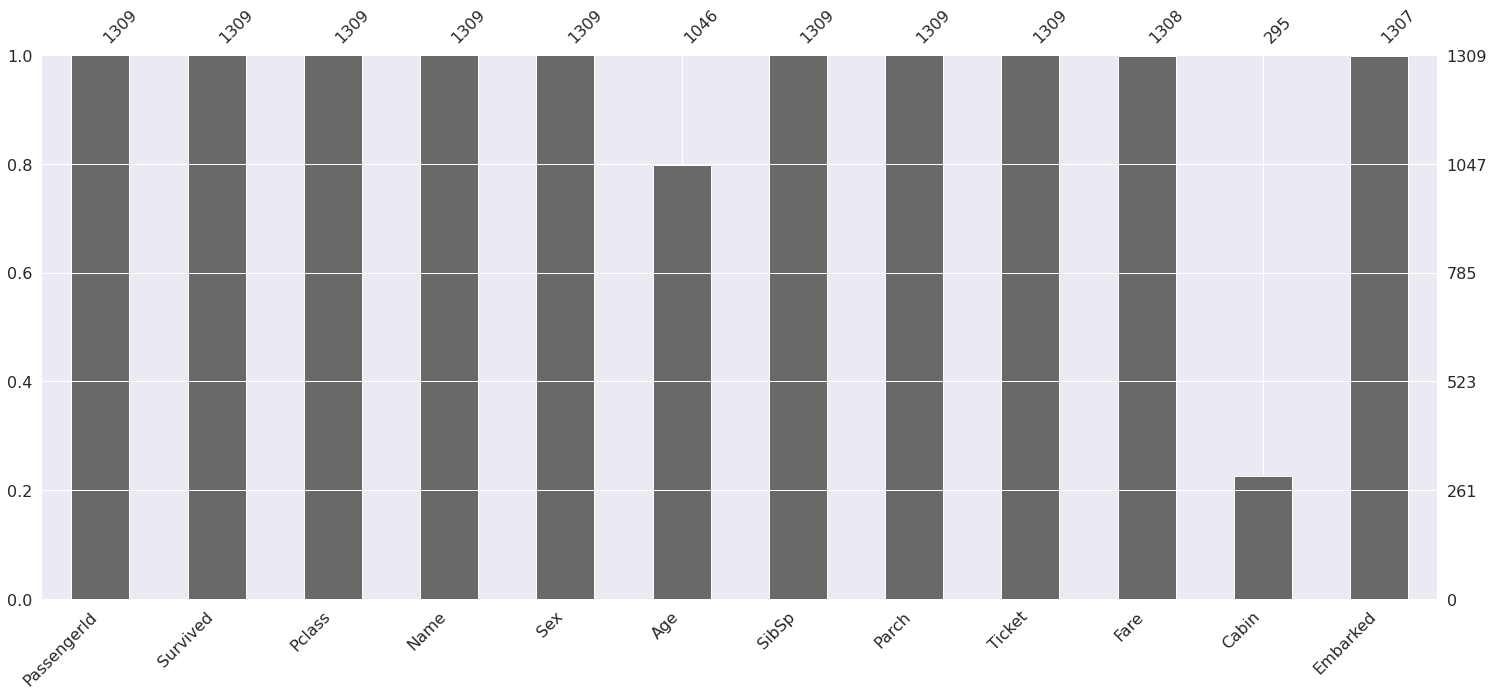

In [20]:
# Detect missing values
import missingno as msno
# Visualisation
msno.bar(df)

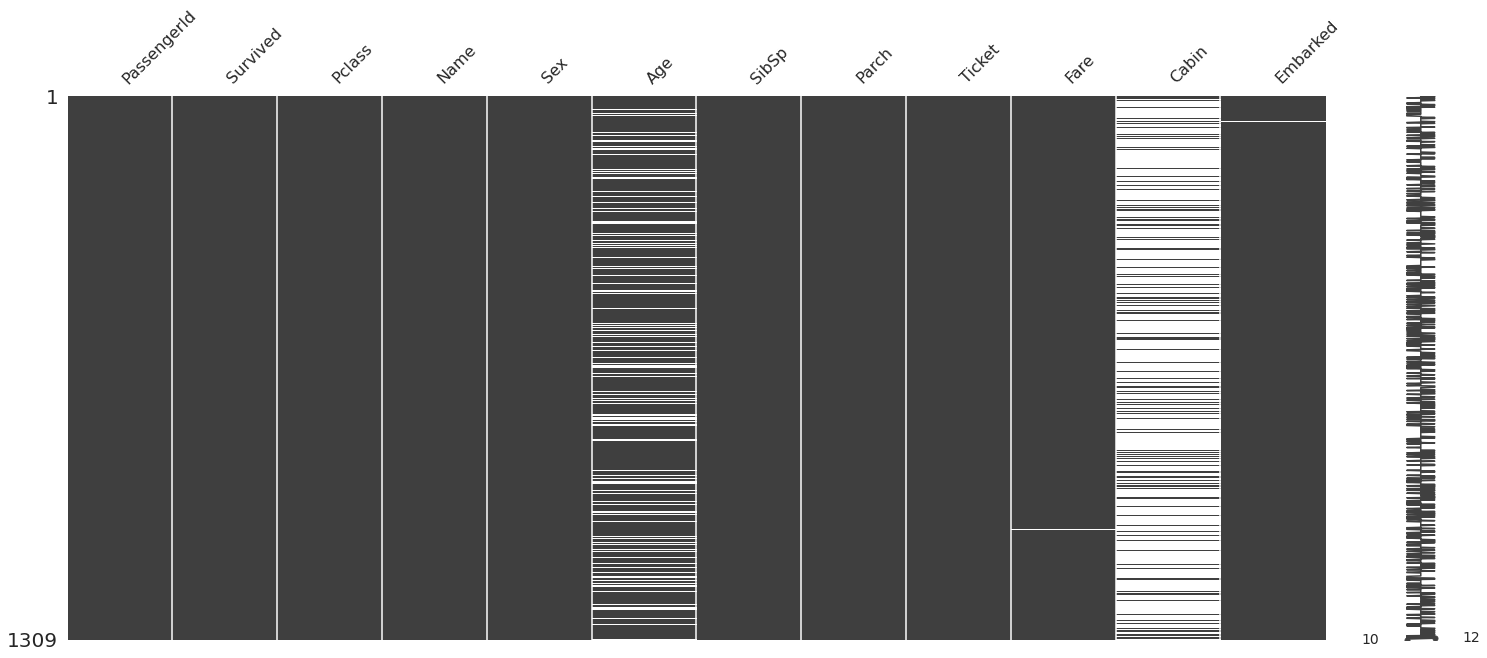

In [21]:
#gives positional information of the missing value
msno.matrix(df)

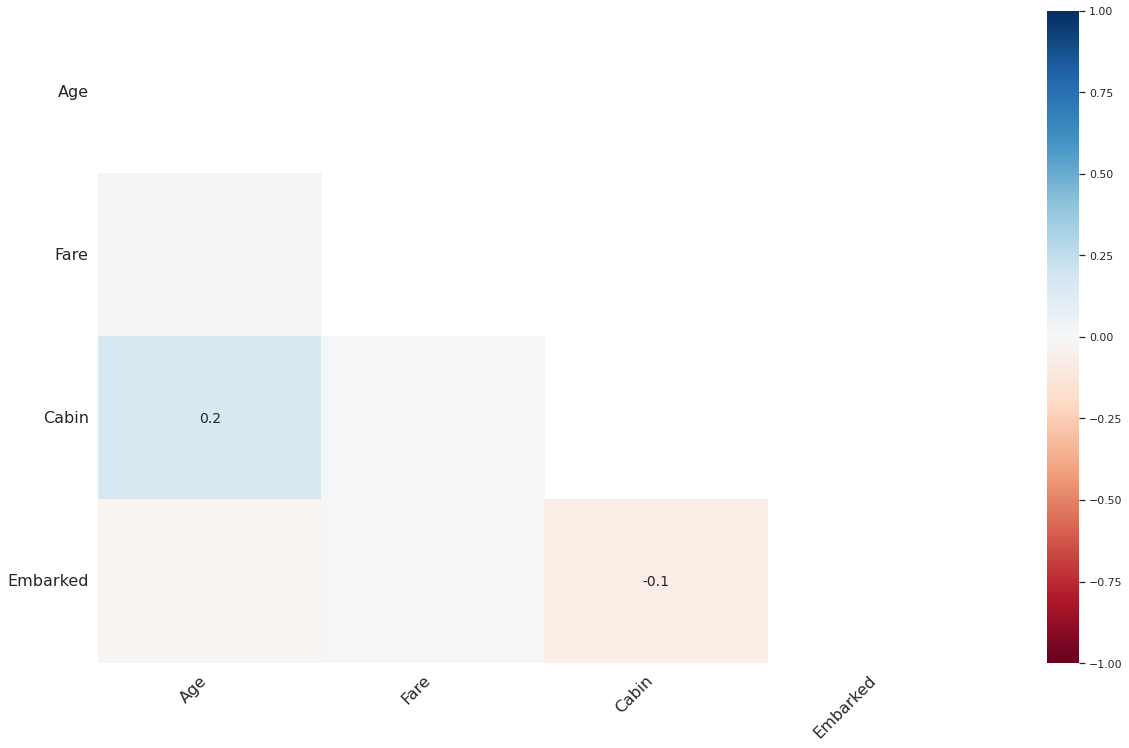

In [22]:
msno.heatmap(df)

#### Dealing with missing values. Fix the missing value problem.



1.   Do analysis using plots. Fix issues.

2.   Provide an appropriate discussion




In [23]:
df.isnull().sum().sum()

1280

In [92]:
df['Age'].describe()

count    1309.000000
mean       29.827987
std        13.771643
min         0.170000
25%        21.000000
50%        28.000000
75%        38.000000
max        80.000000
Name: Age, dtype: float64

In [90]:
# Code Here (Add as many cells as you need)
#Replace Age with 'mean age' value
df_missing_val_replaced = df.fillna(value = df['Age'].mean().astype('int'))
df_missing_val_replaced

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  33.5      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  38.5      0   
417                           Peter, Master. Michael J    male  38.5      1   

     Parch              Ticket      Fare Cabin Embarked  Age_Filled  
0        0           A/5 21171    7.2500    29        S        22.0  
1        0            PC 17599   71.2833   C85        C        38.0  
2        0    STON/O2. 3101282    7.9250    29        S        26.0  
3        0              113803   53.1000  C123        S        35.0  
4        0              373450    8.0500    29        S        35.0  
..     ...                 ...       ...   ...      ...         ...  
413      0           A.5. 3236    8.0500    29        S        33.5  
414      0            PC 17758  108.9000  C105        C        39.0  
415      0  SOTON/O.Q. 3101262    7.2500    29        S        38.5  
416      0              359309    8.0500    29        S        38.5  
417      1                2668   22.3583    29        C        38.5  

[1309 rows x 13 columns]

In [91]:
df["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [93]:
#Replacing fare value with max
df_missing_val_replaced = df_missing_val_replaced.fillna(value = df['Fare'].mean())
df_missing_val_replaced

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  33.5      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  38.5      0   
417                           Peter, Master. Michael J    male  38.5      1   

     Parch              Ticket      Fare Cabin Embarked  Age_Filled  
0        0           A/5 21171    7.2500    29        S        22.0  
1        0            PC 17599   71.2833   C85        C        38.0  
2        0    STON/O2. 3101282    7.9250    29        S        26.0  
3        0              113803   53.1000  C123        S        35.0  
4        0              373450    8.0500    29        S        35.0  
..     ...                 ...       ...   ...      ...         ...  
413      0           A.5. 3236    8.0500    29        S        33.5  
414      0            PC 17758  108.9000  C105        C        39.0  
415      0  SOTON/O.Q. 3101262    7.2500    29        S        38.5  
416      0              359309    8.0500    29        S        38.5  
417      1                2668   22.3583    29        C        38.5  

[1309 rows x 13 columns]

In [26]:
#filling null values with previous values 
df4 = df.fillna(method = 'pad')
df4.isnull().sum().sum()

1

In [27]:
#filling the null values with the next value
df5 = df.fillna(method = 'bfill') #backward fill
df5.isnull().sum().sum()

5

In [28]:
#fillng this null values column wise
df6 = df.fillna(method = 'pad', axis = 1)
df6.isnull().sum().sum()

0

In [29]:
#fillng this null values column wise
df7 = df.fillna(method = 'bfill', axis = 1)
df7.isnull().sum().sum()


2

In [30]:
df_dropped_cabin = df_missing_val_replaced.drop(['Cabin'], axis =1)
df_dropped_cabin

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  29.0      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  29.0      0   
417                           Peter, Master. Michael J    male  29.0      1   

     Parch              Ticket      Fare Embarked  
0        0           A/5 21171    7.2500        S  
1        0            PC 17599   71.2833        C  
2        0    STON/O2. 3101282    7.9250        S  
3        0              113803   53.1000        S  
4        0              373450    8.0500        S  
..     ...                 ...       ...      ...  
413      0           A.5. 3236    8.0500        S  
414      0            PC 17758  108.9000        C  
415      0  SOTON/O.Q. 3101262    7.2500        S  
416      0              359309    8.0500        S  
417      1                2668   22.3583        C  

[1309 rows x 11 columns]

In [32]:
#drop those null rows
df_dropNull = df.dropna()
df_dropNull

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
404         1296         0       1   
405         1297         0       2   
407         1299         0       1   
411         1303         1       1   
414         1306         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
404                       Frauenthal, Mr. Isaac Gerald    male  43.0      1   
405       Nourney, Mr. Alfred (Baron von Drachstedt")"    male  20.0      0   
407                         Widener, Mr. George Dunton    male  50.0      1   
411    Minahan, Mrs. William Edward (Lillian E Thorpe)  female  37.0      1   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   

     Parch         Ticket      Fare Cabin Embarked  
1        0       PC 17599   71.2833   C85        C  
3        0         113803   53.1000  C123        S  
6        0          17463   51.8625   E46        S  
10       1        PP 9549   16.7000    G6        S  
11       0         113783   26.5500  C103        S  
..     ...            ...       ...   ...      ...  
404      0          17765   27.7208   D40        C  
405      0  SC/PARIS 2166   13.8625   D38        C  
407      1         113503  211.5000   C80        C  
411      0          19928   90.0000   C78        Q  
414      0       PC 17758  108.9000  C105        C  

[270 rows x 12 columns]

In [33]:
df_dropAllNull = df.dropna(how = 'all') #removes only which all values are null in a row
df_dropAllNull

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male   NaN      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male   NaN      0   
417                           Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [34]:
df_drop_fullrow = df.dropna(how = 'any') #any null values then drop the whole row
df_drop_fullrow

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
404         1296         0       1   
405         1297         0       2   
407         1299         0       1   
411         1303         1       1   
414         1306         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
404                       Frauenthal, Mr. Isaac Gerald    male  43.0      1   
405       Nourney, Mr. Alfred (Baron von Drachstedt")"    male  20.0      0   
407                         Widener, Mr. George Dunton    male  50.0      1   
411    Minahan, Mrs. William Edward (Lillian E Thorpe)  female  37.0      1   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   

     Parch         Ticket      Fare Cabin Embarked  
1        0       PC 17599   71.2833   C85        C  
3        0         113803   53.1000  C123        S  
6        0          17463   51.8625   E46        S  
10       1        PP 9549   16.7000    G6        S  
11       0         113783   26.5500  C103        S  
..     ...            ...       ...   ...      ...  
404      0          17765   27.7208   D40        C  
405      0  SC/PARIS 2166   13.8625   D38        C  
407      1         113503  211.5000   C80        C  
411      0          19928   90.0000   C78        Q  
414      0       PC 17758  108.9000  C105        C  

[270 rows x 12 columns]

In [35]:
#interpolate()1 2 3 4 NaN 6 7 8 9 the the fucnction will automatically fill yhe NaN with 5
 #this method is linearly distributed
df['Age'] = df['Age'].interpolate(method = 'linear',limit_direction = 'forward' )
df


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  33.5      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  38.5      0   
417                           Peter, Master. Michael J    male  38.5      1   

     Parch              Ticket      Fare Cabin Embarked  
0        0           A/5 21171    7.2500   NaN        S  
1        0            PC 17599   71.2833   C85        C  
2        0    STON/O2. 3101282    7.9250   NaN        S  
3        0              113803   53.1000  C123        S  
4        0              373450    8.0500   NaN        S  
..     ...                 ...       ...   ...      ...  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [31]:
updated_titanic_dataset = df_dropped_cabin.copy()
updated_titanic_dataset

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  29.0      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  29.0      0   
417                           Peter, Master. Michael J    male  29.0      1   

     Parch              Ticket      Fare Embarked  
0        0           A/5 21171    7.2500        S  
1        0            PC 17599   71.2833        C  
2        0    STON/O2. 3101282    7.9250        S  
3        0              113803   53.1000        S  
4        0              373450    8.0500        S  
..     ...                 ...       ...      ...  
413      0           A.5. 3236    8.0500        S  
414      0            PC 17758  108.9000        C  
415      0  SOTON/O.Q. 3101262    7.2500        S  
416      0              359309    8.0500        S  
417      1                2668   22.3583        C  

[1309 rows x 11 columns]

In [95]:
updated_titanic_dataset.skew()

<ipython-input-95-f66eadfc3a8b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  updated_titanic_dataset.skew()


PassengerId     0.000000
Survived        0.506478
Pclass         -0.598647
Age             0.496621
SibSp           3.844220
Parch           3.669078
Fare            4.369530
Embarked       16.159325
Sex_Number      0.602189
dtype: float64

 ##### Discuss your findings

 If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
If the skewness is less than -1 or greater than 1, the data are highly skewed

### 2.3 Analysing Patterns using Visualisations

The data type of 'Sex' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'. 

In [36]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
updated_titanic_dataset['Sex_Number'] = np.where((updated_titanic_dataset['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
updated_titanic_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  Sex_Number  
0      0         A/5 21171   7.2500        S           0  
1      0          PC 17599  71.2833        C           1  
2      0  STON/O2. 3101282   7.9250        S           1  
3      0            113803  53.1000        S           1  
4      0            373450   8.0500        S           0

In [37]:
#df_embarked = df.replace({'Embarked' : {'S' : 1, 'Q' : 2, 'C' : 3}})
#df_embarked

updated_titanic_dataset.Embarked [df.Embarked == 'S'] = 1
updated_titanic_dataset.Embarked [df.Embarked == 'C'] = 2
updated_titanic_dataset.Embarked [df.Embarked == 'Q'] = 3
updated_titanic_dataset


<ipython-input-37-6760459f22c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_titanic_dataset.Embarked [df.Embarked == 'S'] = 1
<ipython-input-37-6760459f22c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_titanic_dataset.Embarked [df.Embarked == 'C'] = 2
<ipython-input-37-6760459f22c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_titanic_dataset.Embarked [df.Embarked == 'Q'] = 3


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  29.0      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  29.0      0   
417                           Peter, Master. Michael J    male  29.0      1   

     Parch              Ticket      Fare Embarked  Sex_Number  
0        0           A/5 21171    7.2500        1           0  
1        0            PC 17599   71.2833        2           1  
2        0    STON/O2. 3101282    7.9250        1           1  
3        0              113803   53.1000        1           1  
4        0              373450    8.0500        1           0  
..     ...                 ...       ...      ...         ...  
413      0           A.5. 3236    8.0500        1           0  
414      0            PC 17758  108.9000        2           1  
415      0  SOTON/O.Q. 3101262    7.2500        1           0  
416      0              359309    8.0500        1           0  
417      1                2668   22.3583        2           0  

[1309 rows x 12 columns]

#### 2.3.1 Visualization of column correlation (use groupby). Also, plot Heat Map

In [38]:
# Correlation table including the new column 'SexNo'
correlation = updated_titanic_dataset.corr()
#correlation
corr = updated_titanic_dataset.groupby('Sex')[['Survived',	'Pclass']].corr()
corr

Survived    Pclass
Sex                                
female Survived  1.000000 -0.369673
       Pclass   -0.369673  1.000000
male   Survived  1.000000 -0.168182
       Pclass   -0.168182  1.000000

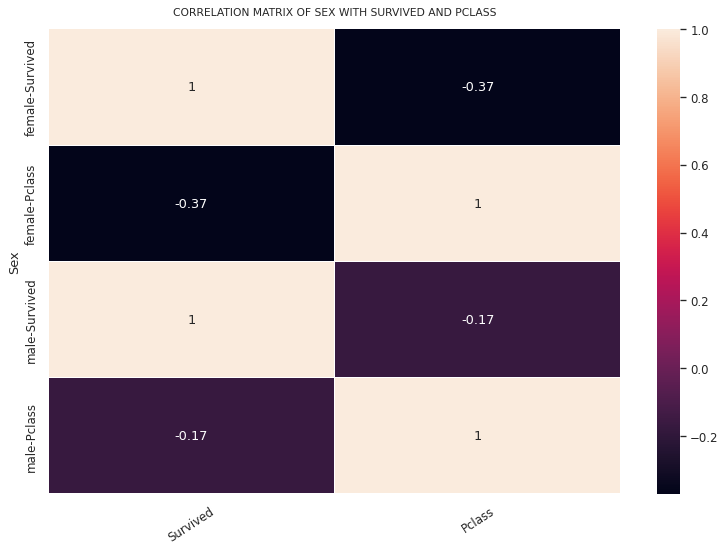

In [39]:
#heatmap of correlation
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(corr, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix of Sex with Survived and Pclass'.upper(), size=10, pad=13)
plt.ylabel('Sex')
plt.xticks(rotation=33)
plt.show()

In [40]:
#correlation between embarked, survived and pclass
correlation1 = updated_titanic_dataset.groupby('Embarked')[['Survived',	'Pclass']].corr()
correlation1

Survived    Pclass
Embarked                             
1        Survived  1.000000 -0.275688
         Pclass   -0.275688  1.000000
2        Survived  1.000000 -0.271718
         Pclass   -0.271718  1.000000
3        Survived  1.000000 -0.012666
         Pclass   -0.012666  1.000000
29       Survived       NaN       NaN
         Pclass         NaN       NaN

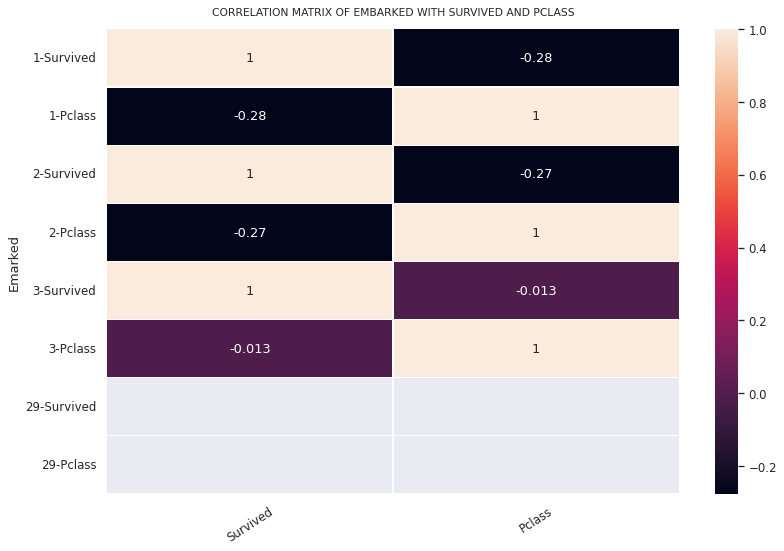

In [41]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation1, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix of Embarked with Survived and Pclass'.upper(), size=10, pad=13)
plt.ylabel('Emarked')
plt.xticks(rotation=33)
plt.show()

In [42]:
corr_sex = updated_titanic_dataset.groupby('Sex')[['PassengerId','Survived',	'Pclass', 'Embarked', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
corr_sex

PassengerId  Survived    Pclass       Age     SibSp  \
Sex                                                                       
female PassengerId     1.000000  0.255518 -0.066358  0.088332 -0.046699   
       Survived        0.255518  1.000000 -0.369673  0.098850 -0.232512   
       Pclass         -0.066358 -0.369673  1.000000 -0.389453  0.099288   
       Age             0.088332  0.098850 -0.389453  1.000000 -0.134860   
       SibSp          -0.046699 -0.232512  0.099288 -0.134860  1.000000   
       Parch           0.034852 -0.176740  0.105077 -0.082191  0.278316   
       Fare            0.062873  0.168121 -0.618673  0.251486  0.081558   
male   PassengerId     1.000000 -0.188106 -0.024696 -0.012511 -0.058745   
       Survived       -0.188106  1.000000 -0.168182 -0.082671 -0.011080   
       Pclass         -0.024696 -0.168182  1.000000 -0.378112  0.060106   
       Age            -0.012511 -0.082671 -0.378112  1.000000 -0.218504   
       SibSp          -0.058745 -0.011080  0.060106 -0.218504  1.000000   
       Parch          -0.006569  0.059760 -0.003813 -0.155096  0.442302   
       Fare            0.011648  0.133157 -0.502488  0.139742  0.202378   

                       Parch      Fare  
Sex                                     
female PassengerId  0.034852  0.062873  
       Survived    -0.176740  0.168121  
       Pclass       0.105077 -0.618673  
       Age         -0.082191  0.251486  
       SibSp        0.278316  0.081558  
       Parch        1.000000  0.101780  
       Fare         0.101780  1.000000  
male   PassengerId -0.006569  0.011648  
       Survived     0.059760  0.133157  
       Pclass      -0.003813 -0.502488  
       Age         -0.155096  0.139742  
       SibSp        0.442302  0.202378  
       Parch        1.000000  0.296585  
       Fare         0.296585  1.000000

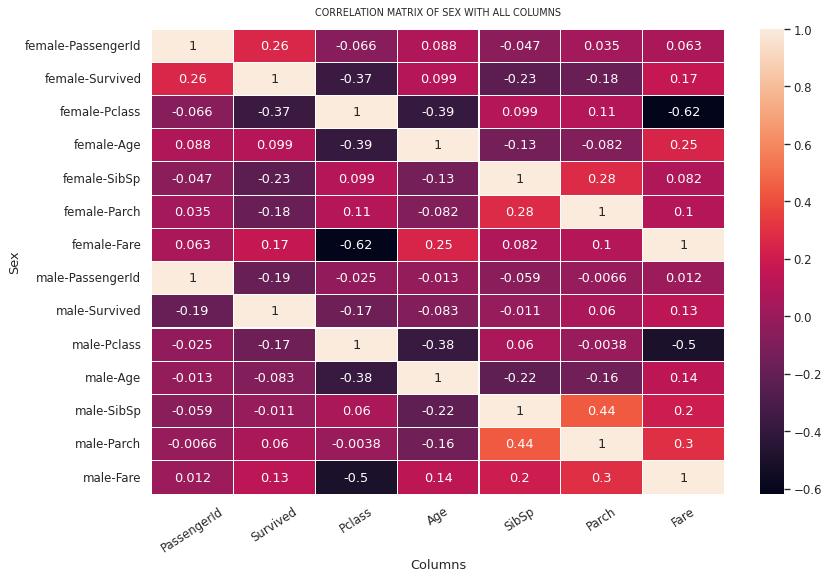

In [43]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(corr_sex, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix of Sex with all columns'.upper(), size=9, pad=13)
plt.xlabel('Columns')
plt.ylabel('Sex')
plt.xticks(rotation=33)
plt.show()

In [44]:
corr_class = updated_titanic_dataset.groupby('Pclass')[['PassengerId','Survived',	'Sex', 'Embarked', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
corr_class

PassengerId  Survived       Age     SibSp     Parch  \
Pclass                                                                    
1      PassengerId     1.000000 -0.051023  0.086964  0.003299 -0.005521   
       Survived       -0.051023  1.000000 -0.130819  0.142209  0.088111   
       Age             0.086964 -0.130819  1.000000  0.002667 -0.092535   
       SibSp           0.003299  0.142209  0.002667  1.000000  0.281376   
       Parch          -0.005521  0.088111 -0.092535  0.281376  1.000000   
       Fare            0.036419  0.195413 -0.063419  0.264400  0.403793   
2      PassengerId     1.000000 -0.134289 -0.022511  0.011845  0.018691   
       Survived       -0.134289  1.000000 -0.247301  0.160813  0.379644   
       Age            -0.022511 -0.247301  1.000000 -0.178161 -0.249984   
       SibSp           0.011845  0.160813 -0.178161  1.000000  0.282419   
       Parch           0.018691  0.379644 -0.249984  0.282419  1.000000   
       Fare            0.061921  0.125939 -0.177376  0.464133  0.403269   
3      PassengerId     1.000000  0.022765 -0.011652 -0.079740  0.012394   
       Survived        0.022765  1.000000 -0.137405 -0.035655  0.053451   
       Age            -0.011652 -0.137405  1.000000 -0.279241 -0.119911   
       SibSp          -0.079740 -0.035655 -0.279241  1.000000  0.406932   
       Parch           0.012394  0.053451 -0.119911  0.406932  1.000000   
       Fare           -0.029177  0.020342 -0.147418  0.738844  0.619508   

                        Fare  
Pclass                        
1      PassengerId  0.036419  
       Survived     0.195413  
       Age         -0.063419  
       SibSp        0.264400  
       Parch        0.403793  
       Fare         1.000000  
2      PassengerId  0.061921  
       Survived     0.125939  
       Age         -0.177376  
       SibSp        0.464133  
       Parch        0.403269  
       Fare         1.000000  
3      PassengerId -0.029177  
       Survived     0.020342  
       Age         -0.147418  
       SibSp        0.738844  
       Parch        0.619508  
       Fare         1.000000

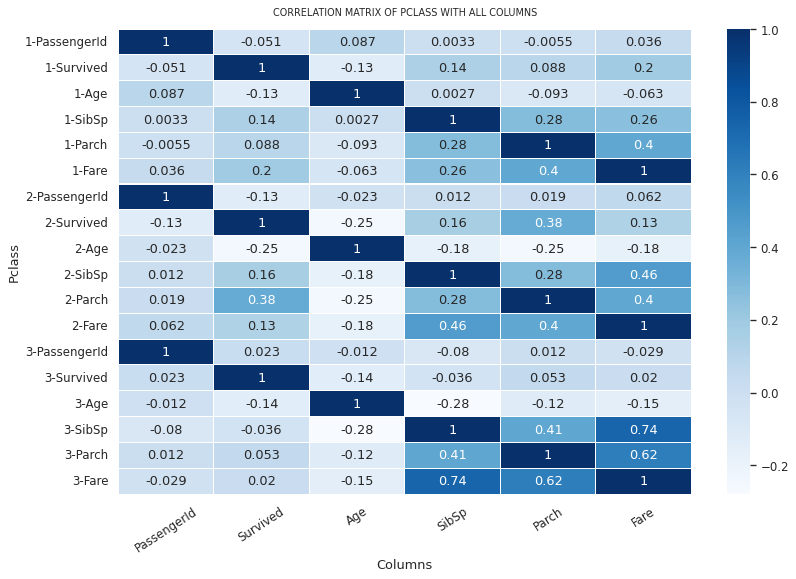

In [45]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(corr_class, linecolor='white',linewidths=0.1, cmap='Blues', annot=True)
plt.title('Correlation Matrix of Pclass with all columns'.upper(), size=9, pad=13)
plt.xlabel('Columns')
plt.ylabel('Pclass')
plt.xticks(rotation=33)
plt.show()

In [46]:
corr_age = updated_titanic_dataset.groupby('SibSp')[['PassengerId','Survived',	'Sex', 'Embarked', 'Pclass', 'Age', 'Parch', 'Fare']].corr()
corr_age

PassengerId  Survived    Pclass       Age     Parch  \
SibSp                                                                    
0     PassengerId     1.000000 -0.049793 -0.004545 -0.045220 -0.009994   
      Survived       -0.049793  1.000000 -0.228278 -0.056412  0.206118   
      Pclass         -0.004545 -0.228278  1.000000 -0.334861 -0.075964   
      Age            -0.045220 -0.056412 -0.334861  1.000000 -0.090661   
      Parch          -0.009994  0.206118 -0.075964 -0.090661  1.000000   
      Fare            0.016844  0.253809 -0.503691  0.140424  0.155360   
1     PassengerId     1.000000 -0.002954 -0.082002  0.076613  0.099896   
      Survived       -0.002954  1.000000 -0.231131 -0.135679 -0.031392   
      Pclass         -0.082002 -0.231131  1.000000 -0.409959  0.168632   
      Age             0.076613 -0.135679 -0.409959  1.000000 -0.010019   
      Parch           0.099896 -0.031392  0.168632 -0.010019  1.000000   
      Fare            0.127247  0.119256 -0.687858  0.381104  0.156224   
2     PassengerId     1.000000  0.133703 -0.157789  0.152901 -0.065747   
      Survived        0.133703  1.000000 -0.328501 -0.021091  0.241491   
      Pclass         -0.157789 -0.328501  1.000000 -0.391108 -0.186784   
      Age             0.152901 -0.021091 -0.391108  1.000000 -0.468196   
      Parch          -0.065747  0.241491 -0.186784 -0.468196  1.000000   
      Fare            0.017001  0.133748 -0.664802  0.001255  0.406873   
3     PassengerId     1.000000 -0.066171  0.125622  0.116262 -0.123812   
      Survived       -0.066171  1.000000 -0.681621  0.442008 -0.041345   
      Pclass          0.125622 -0.681621  1.000000 -0.262863 -0.422724   
      Age             0.116262  0.442008 -0.262863  1.000000 -0.433896   
      Parch          -0.123812 -0.041345 -0.422724 -0.433896  1.000000   
      Fare           -0.165043  0.564997 -0.960999  0.193059  0.561669   
4     PassengerId     1.000000 -0.114701       NaN  0.334860  0.217227   
      Survived       -0.114701  1.000000       NaN  0.420523  0.430331   
      Pclass               NaN       NaN       NaN       NaN       NaN   
      Age             0.334860  0.420523       NaN  1.000000  0.195229   
      Parch           0.217227  0.430331       NaN  0.195229  1.000000   
      Fare           -0.110189 -0.634185       NaN -0.630266 -0.426530   
5     PassengerId     1.000000  0.762154       NaN -0.122938       NaN   
      Survived        0.762154  1.000000       NaN -0.015723       NaN   
      Pclass               NaN       NaN       NaN       NaN       NaN   
      Age            -0.122938 -0.015723       NaN  1.000000       NaN   
      Parch                NaN       NaN       NaN       NaN       NaN   
      Fare                 NaN       NaN       NaN       NaN       NaN   
8     PassengerId     1.000000  0.397684       NaN -0.550974       NaN   
      Survived        0.397684  1.000000       NaN  0.125000       NaN   
      Pclass               NaN       NaN       NaN       NaN       NaN   
      Age            -0.550974  0.125000       NaN  1.000000       NaN   
      Parch                NaN       NaN       NaN       NaN       NaN   
      Fare                 NaN       NaN       NaN       NaN       NaN   

                       Fare  
SibSp                        
0     PassengerId  0.016844  
      Survived     0.253809  
      Pclass      -0.503691  
      Age          0.140424  
      Parch        0.155360  
      Fare         1.000000  
1     PassengerId  0.127247  
      Survived     0.119256  
      Pclass      -0.687858  
      Age          0.381104  
      Parch        0.156224  
      Fare         1.000000  
2     PassengerId  0.017001  
      Survived     0.133748  
      Pclass      -0.664802  
      Age          0.001255  
      Parch        0.406873  
      Fare         1.000000  
3     PassengerId -0.165043  
      Survived     0.564997  
      Pclass      -0.960999  
      Age          0.193059  
      Parch        0.561669  
      Fare  

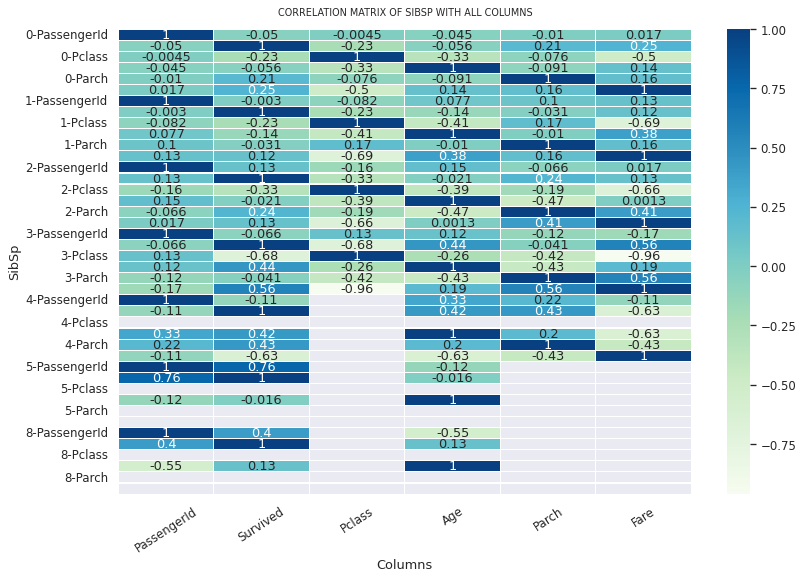

In [47]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(corr_age, linecolor='white',linewidths=0.1, cmap='GnBu', annot=True)
plt.title('Correlation Matrix of SibSp with all columns'.upper(), size=9, pad=13)
plt.xlabel('Columns')
plt.ylabel('SibSp')
plt.xticks(rotation=33)
plt.show()

In [48]:
corr_age = updated_titanic_dataset.groupby('Parch')[['PassengerId','Survived',	'Sex', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Fare']].corr()
corr_age

PassengerId      Survived    Pclass           Age  \
Parch                                                                  
0     PassengerId     1.000000 -5.591721e-02 -0.028670 -1.814215e-02   
      Survived       -0.055917  1.000000e+00 -0.252303  1.712830e-02   
      Pclass         -0.028670 -2.523029e-01  1.000000 -3.903744e-01   
      Age            -0.018142  1.712830e-02 -0.390374  1.000000e+00   
      SibSp          -0.035647  1.352520e-01 -0.144561  5.631039e-02   
      Fare            0.025850  2.711965e-01 -0.563847  1.874409e-01   
1     PassengerId     1.000000  1.203756e-01 -0.117866  7.253188e-02   
      Survived        0.120376  1.000000e+00 -0.247170 -7.651653e-02   
      Pclass         -0.117866 -2.471703e-01  1.000000 -5.931202e-01   
      Age             0.072532 -7.651653e-02 -0.593120  1.000000e+00   
      SibSp          -0.138409 -3.238943e-01  0.410808 -3.249839e-01   
      Fare            0.104429  1.230333e-01 -0.576564  4.031022e-01   
2     PassengerId     1.000000  2.385470e-02  0.023660  1.733670e-01   
      Survived        0.023855  1.000000e+00 -0.343146  3.978571e-02   
      Pclass          0.023660 -3.431458e-01  1.000000 -1.483132e-01   
      Age             0.173367  3.978571e-02 -0.148313  1.000000e+00   
      SibSp          -0.064505 -3.980013e-01  0.379710 -1.168942e-01   
      Fare           -0.076940  4.065509e-02 -0.701683  6.717858e-02   
3     PassengerId     1.000000  3.021293e-01 -0.523136  6.740417e-01   
      Survived        0.302129  1.000000e+00 -0.206725 -1.418597e-01   
      Pclass         -0.523136 -2.067246e-01  1.000000 -6.289746e-01   
      Age             0.674042 -1.418597e-01 -0.628975  1.000000e+00   
      SibSp          -0.508626 -1.615146e-01 -0.233723  3.932727e-02   
      Fare            0.444625 -1.804571e-01 -0.824375  5.965955e-01   
4     PassengerId     1.000000  9.228067e-01 -0.257430 -1.082602e-01   
      Survived        0.922807  1.000000e+00 -0.250000 -4.593685e-17   
      Pclass         -0.257430 -2.500000e-01  1.000000 -9.051052e-01   
      Age            -0.108260 -4.593685e-17 -0.905105  1.000000e+00   
      SibSp          -0.475810 -2.500000e-01 -0.500000  8.016646e-01   
      Fare            0.250389  2.495734e-01 -0.999793  9.117237e-01   
5     PassengerId     1.000000 -5.774213e-01       NaN  5.490917e-01   
      Survived       -0.577421  1.000000e+00       NaN -6.324555e-01   
      Pclass               NaN           NaN       NaN           NaN   
      Age             0.549092 -6.324555e-01       NaN  1.000000e+00   
      SibSp          -0.394364  3.162278e-01       NaN -5.000000e-01   
      Fare            0.010920 -1.283109e-01       NaN  7.676618e-01   
6     PassengerId     1.000000           NaN       NaN -1.000000e+00   
      Survived             NaN           NaN       NaN           NaN   
      Pclass               NaN           NaN       NaN           NaN   
      Age            -1.000000           NaN       NaN  1.000000e+00   
      SibSp                NaN           NaN       NaN           NaN   
      Fare                 NaN           NaN       NaN           NaN   
9     PassengerId     1.000000  1.000000e+00       NaN           NaN   
      Survived        1.000000  1.000000e+00       NaN           NaN   
      Pclass               NaN           NaN       NaN           NaN   
      Age                  NaN           NaN       NaN           NaN   
      SibSp                NaN           NaN       NaN           NaN   
      Fare                 NaN           NaN       NaN           NaN   

                      SibSp      Fare  
Parch                                  
0     PassengerId -0.035647  0.025850  
      Survived     0.135252  0.271196  
      Pclass      -0.144561 -0.563847  
      Age          0.056310  0.187441  
      SibSp        1.000000  0.177401  
      Fare         0.177401  1.000000  
1     PassengerId -0.138409  0.104429  
      Survived    -0.323894  0.123033  
      Pclass      

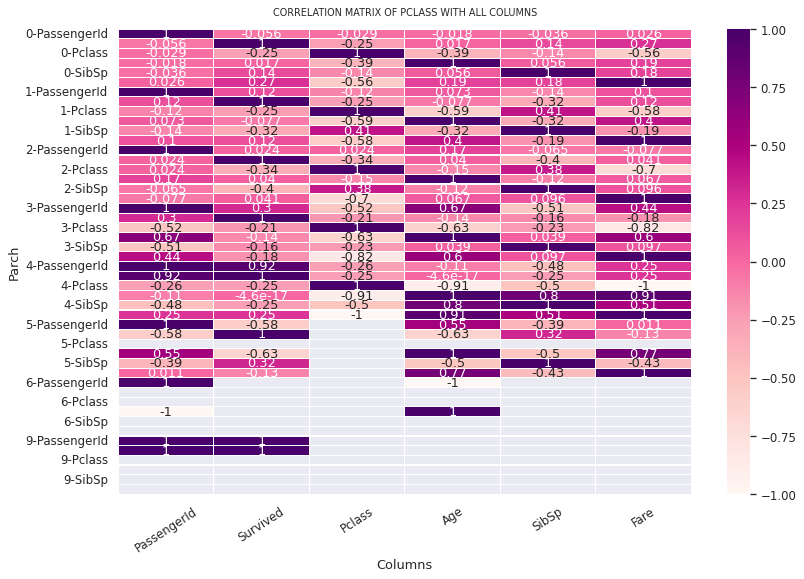

In [49]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(corr_age, linecolor='white',linewidths=0.1, cmap='RdPu', annot=True)
plt.title('Correlation Matrix of Pclass with all columns'.upper(), size=9, pad=13)
plt.xlabel('Columns')
plt.ylabel('Parch')
plt.xticks(rotation=33)
plt.show()

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

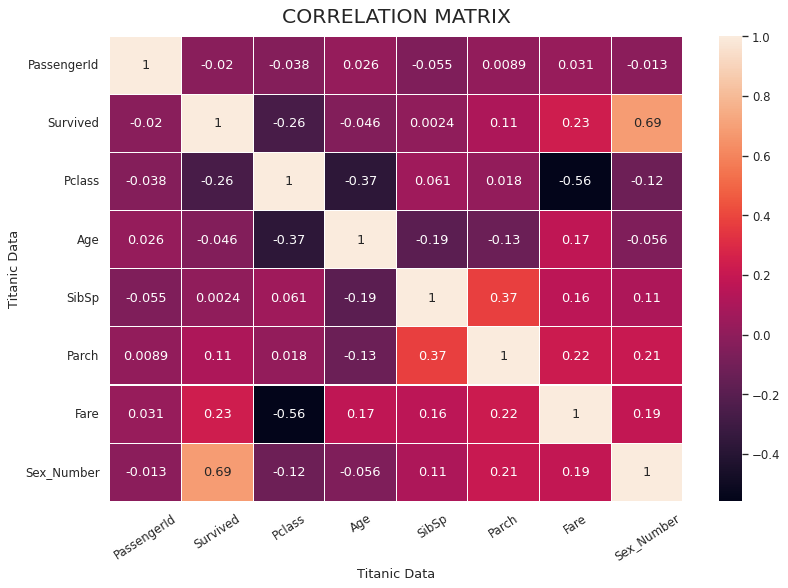

In [50]:
# Visualisation of the corralation table


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.1)? Write in your own words in this cell.

Write below:



#### 2.3.2 Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



##### 2.3.2.1 Sex Proportion

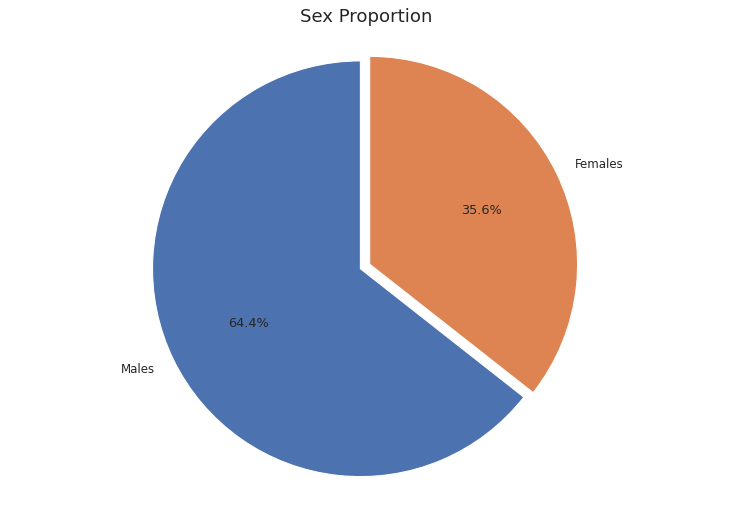

In [51]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.1)? Write in your own words in this cell.

Write below: From the above pie chart, we can see that about 64.4% males and 35.6% females in our given dataset.



##### 2.3.2.2 Age comparision of the people who survived and those who died

In [52]:
# How many people survived ('Survived' == 1)
survived_data=updated_titanic_dataset.Survived.value_counts().to_frame()
survived_data

Survived
0       815
1       494

In [53]:
pd.pivot_table(updated_titanic_dataset, index="Survived", values=['Pclass','SibSp', 'Parch', 'Fare'])

Fare     Parch    Pclass     SibSp
Survived                                         
0         23.885408  0.311656  2.467485  0.496933
1         48.811497  0.506073  2.010121  0.502024

In [54]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

len   min   max       mean  median
Survived                                    
0         815  0.33  74.0  30.415053    28.5
1         494  0.17  80.0  28.859447    28.0

In [55]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [56]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

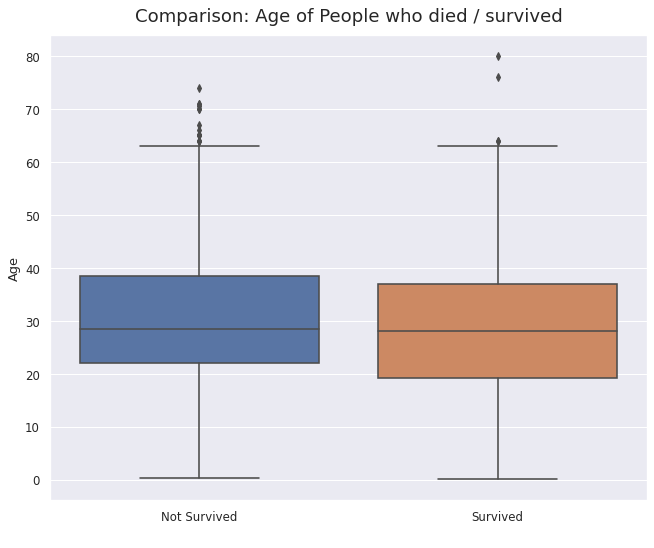

In [57]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.2)? Write in your own words in this cell.

Write below:From above analysis, we can checked how many survived in total and in each classes(Fare, SibSp, Parch, Pclass). Then checked the length, minimum, maximum, mean & mdeian of survived and not survived. Then we have filled the missing values of each class with the median of women and men and then created a column for it and then generated a boxplot. From the above box plot, we can observe that there are more not survived outliers than that of survived. The median of survived is also higher than that of not survived. We can say that people who are older had not survived more compared to that of survived.



##### 2.3.2.3 The barplot compares the survival 

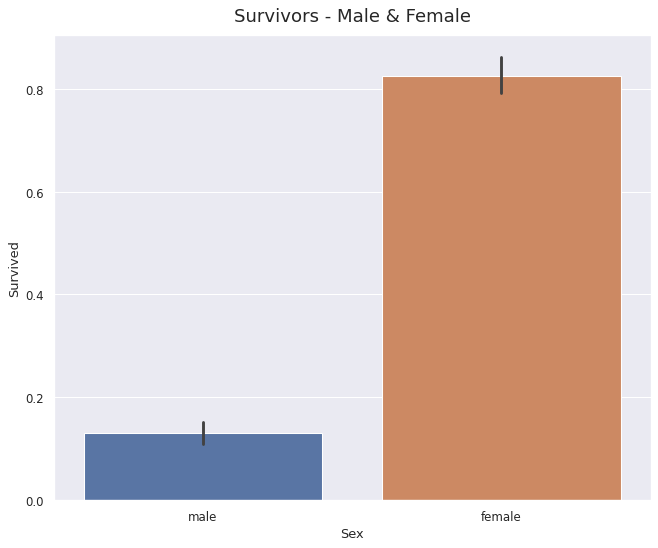

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.3)? Write in your own words in this cell.

Write below:From the bar plot, we can see the huge difference between the survived data of both genders. The female gender rate of survival is higer then 0.8 and the male is lower then 0.2. Therefore, it can be said that females have survived more than males have as per plot.

##### 2.3.2.4 Comparison: Survivors - Male & Female

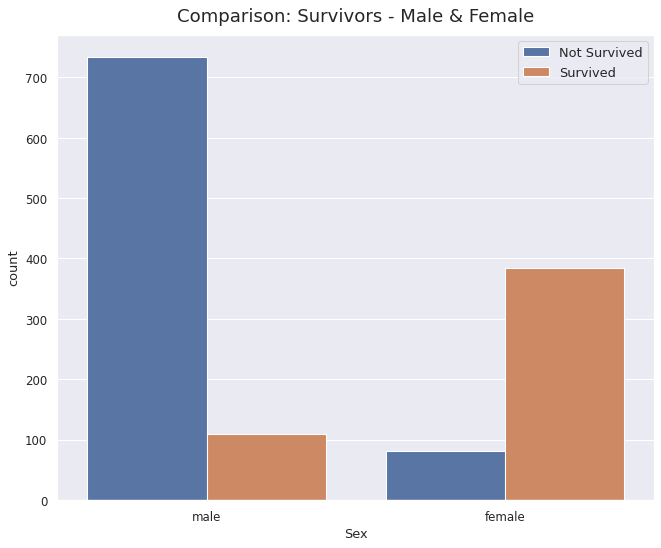

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.4)? Write in your own words in this cell.

Write below: This is a more specific visualization of the statistical difference of how many male and female have survived and not survived. Clearly we can see that more than 700 males couldn't survive and about 100 males did survive.

In [96]:
only_fem = updated_titanic_dataset[updated_titanic_dataset.Sex != 'male'] 
only_sur = updated_titanic_dataset[updated_titanic_dataset.Survived != 0]
fem_sur = pd.merge(only_fem, only_sur, on=["PassengerId"])
percentage_female = len(fem_sur)/len(df) * 100
percentage_female
#fem_sur
#only_fem.info()
#only_sur.info()
#fem_sur.info()

29.411764705882355

In [97]:
# Find percentage of men who survived
only_male = updated_titanic_dataset[updated_titanic_dataset.Sex == 'male'] 
only_sur1 = updated_titanic_dataset[updated_titanic_dataset.Survived == 1]
male_sur = pd.merge(only_male, only_sur1, on=["PassengerId"])

#male_sur
#only_male.info()
#only_male
#only_sur
#male_sur
#percentage_male

#ms=male_sur['Sex_x'].count()
ms=len(male_sur['Sex_x'])
print("Total Male in df is:")
total_male= only_male['Sex'].count()

print(total_male)
print("Total male surived: ")
print(ms)


percentage_male = ms/total_male * 100
print(percentage_male)

Total Male in df is:
843
Total male surived: 
109
12.930011862396205


In [60]:
df.male= df.Sex.str.strip()
#df.sur=df.Survived.str.strip()

df2 = df.loc[(df.Sex=='male') & (df.Survived==1)]
df2['Sex'].count()

<ipython-input-60-24b21282cead>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.male= df.Sex.str.strip()


109

##### 2.3.2.5 Compares the chance of survival for each ticket class

In [61]:
updated_titanic_dataset['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [62]:
updated_titanic_dataset.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0         137
       1         186
2      0         160
       1         117
3      0         518
       1         191

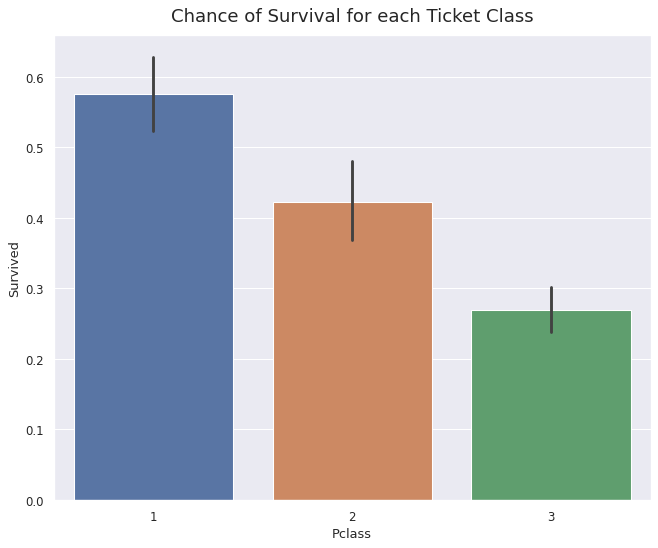

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

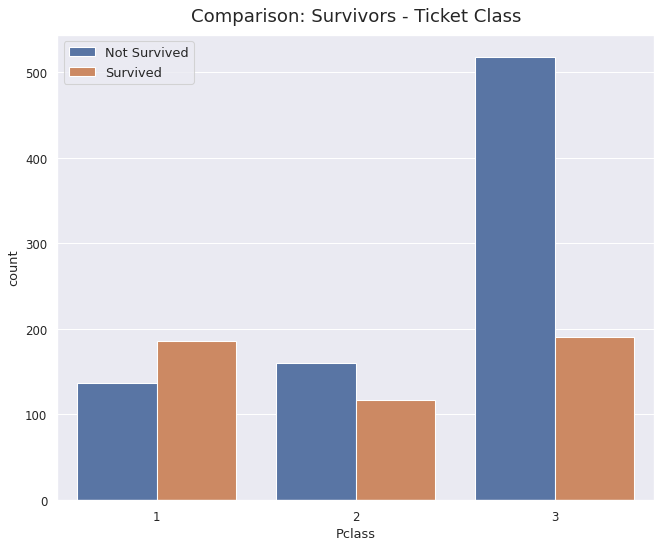

In [ ]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.5)? Write in your own words in this cell.

Write below:At the beginning, we have checked the count value of the classes and then checked how many survived and didn't survived of each class. Then we plotted barplots to visualize the count of each classes and the survived and not survived of each of the classes. From the first bar plot, we can see that class 1 has the highest comapred to the other two which indcates that the passengers were more in class 1 comapared to that of the other two classes. From the second barplot, we can see that The highest number of not survived belongs to class 3. Class 2 having the lowest survival ratio and class 1 and 3 having similar survival count.

##### 2.3.2.6 Chance of Survival for Passengers with Parents or Children

In [ ]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  25.333333
       1        1       141   8.96  76.0  36.496170
                2       100   0.92  60.0  26.873933
                3       144   0.17  63.0  24.204294
male   0        1       134   6.00  71.0  40.362935
                2       154   2.00  70.0  32.110390
                3       446   0.33  74.0  27.618016
       1        1        45   0.92  80.0  35.803778
                2        17   0.67  62.0  16.637059
                3        47   0.42  45.0  22.208404

In [ ]:
df['Parch'].value_counts().to_frame()

Parch
0   1002
1    170
2    113
3      8
5      6
4      6
6      2
9      2

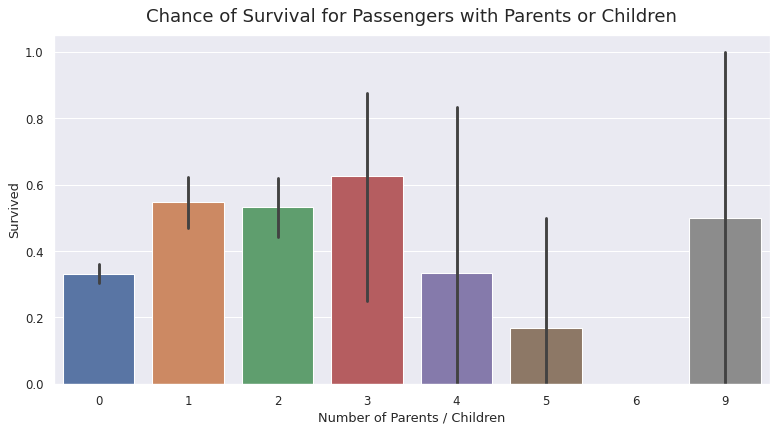

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

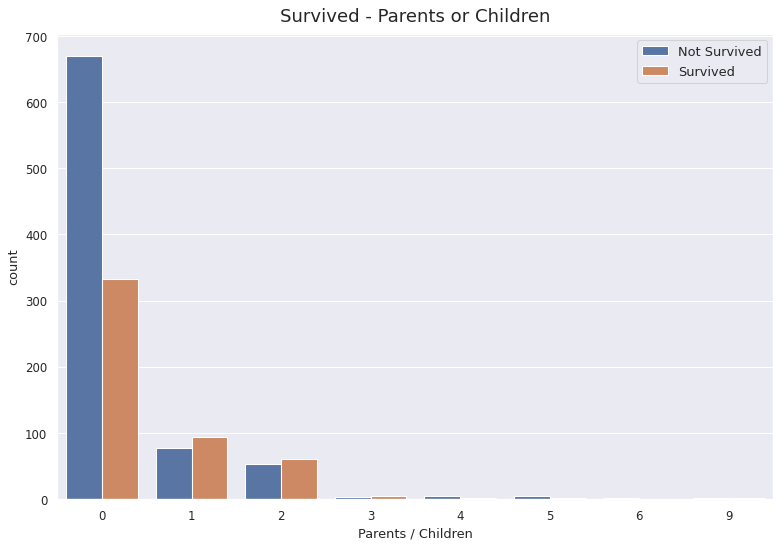

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [ ]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len        min   max
Parch Survived                      
0     0         670   1.333333  74.0
      1         332   1.375000  80.0
1     0          77   0.750000  70.0
      1          93   0.420000  64.0
2     0          53   0.330000  58.0
      1          60   0.170000  64.0
3     0           3  16.000000  61.0
      1           5  24.000000  54.0
4     0           4  29.000000  64.0
      1           2  49.666667  60.0
5     0           5  39.000000  41.0
      1           1  38.000000  38.0
6     0           2  40.000000  43.0
9     0           1  45.000000  45.0
      1           1  24.000000  24.0

 What do you undersend/find from the analysis above (section 2.3.2.6)? Write in your own words in this cell.

Write below:At first, we have checked the average age of women and men of each class who have survived and compared it to that of the average of woman and man who haven't survived. Then we have counted those who were with parent or children. After doing so, we have plotted bar plot of the chances of survival for passengers with parents or children. Later, we have plotted bar plot of age of survived people who were with parent or children and we can see that at 0 is the highest bar indicating that people with no parent of children had a higher chance of survival and thus they survived. The chances decreased as the number or with parent or children increased. Therefore, we can say that people who didn't have their parent and/or children will have a much higher chnace of survival. for further inspection, we have checked the mean, length, minimum and maximum of parents or children column in the dataset and from that we can clearly see that the calculations are higher for 0 and lowest to null as well go down from 0 to 9.

##### 2.3.2.7 This barplot compares the chance of survival within a category

In [ ]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                
0     0         593  31.186849
      1         298  29.359664
1     0         153  33.225054
      1         166  28.953635
2     0          23  24.269565
      1          19  24.293860
3     0          15  15.833333
      1           5  27.600000
4     0          18   7.222222
      1           4  15.750000
5     0           5  10.200000
      1           1  10.000000
8     0           8  29.291667
      1           1  28.500000

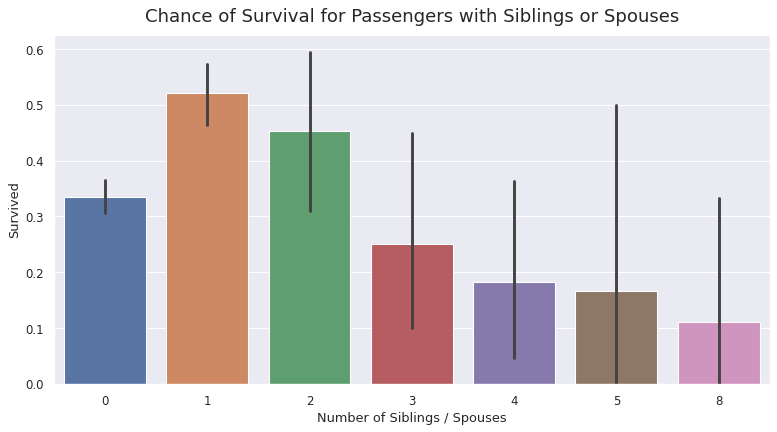

In [ ]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

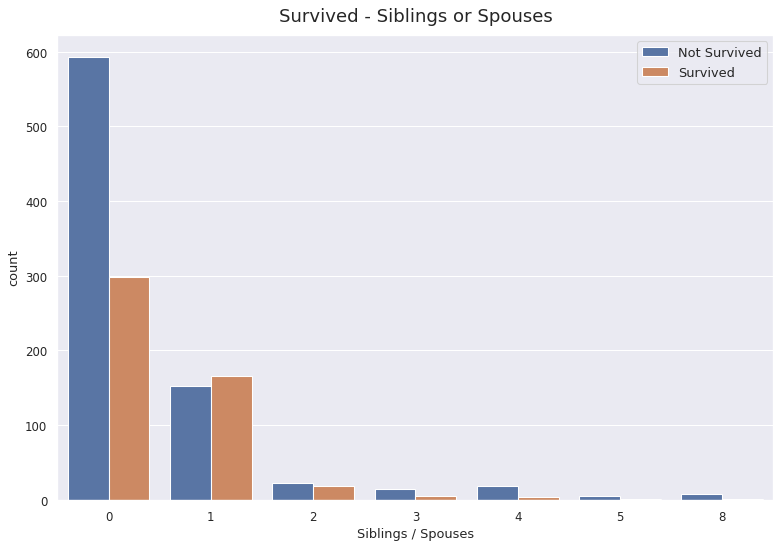

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len    min        max       mean
SibSp Survived                                  
0     0         593   0.33  74.000000  31.186849
      1         298   0.42  80.000000  29.359664
1     0         153   0.75  70.000000  33.225054
      1         166   0.17  76.000000  28.953635
2     0          23   9.00  45.500000  24.269565
      1          19   0.75  59.000000  24.293860
3     0          15   2.00  34.000000  15.833333
      1           5  23.00  33.000000  27.600000
4     0          18   1.00  16.000000   7.222222
      1           4   3.00  38.000000  15.750000
5     0           5   1.00  16.000000  10.200000
      1           1  10.00  10.000000  10.000000
8     0           8  14.50  39.333333  29.291667
      1           1  28.50  28.500000  28.500000

In [ ]:
#result = df.groupby(['SibSp','Survived']).agg({'Age': [len,'mean', 'min', 'max']})
#result

 What do you undersend/find from the analysis above (section 2.3.2.7)? Write in your own words in this cell.

Write below:Similar case can be seen in the above section. people who has siblings or spouses have a lower chance of survival. Therefore, we can say that the more the number of siblings one will have, the lower the chance of survival they have. It is also observed that the bar plot gets lower doen the graph but there are drastic difference between survived and not survived chances. From the first bar plot, we can say that 1 sibling/spouse has the highest cance of survival and 8 having the lowest. However, after plotting the survived and not survived together in a bar plot, we can see that having no spuse/sibling has the highest survival and not survived chances while 8 having no survival chance. A more precise numeric calculations can be seen in length, minimum, maximum and mean. We can see that, there is null values in the last row which indicates that no one survived who had 8 siblings/spouse abroad. 

##### 2.3.2.8 Chance of Survival by Port of Embarkation

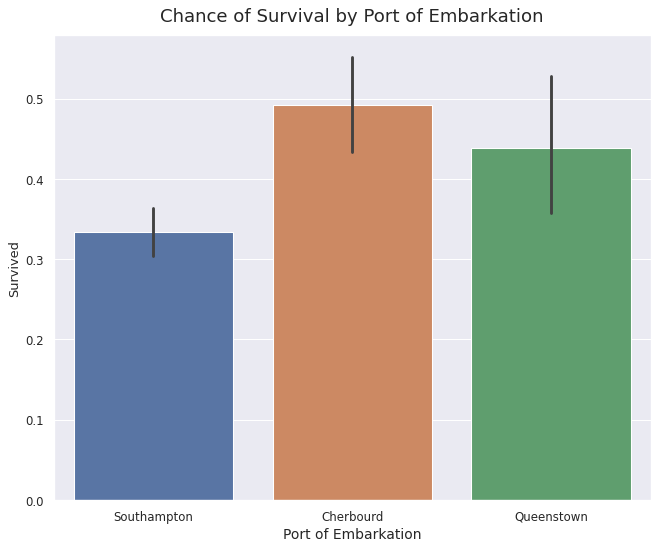

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

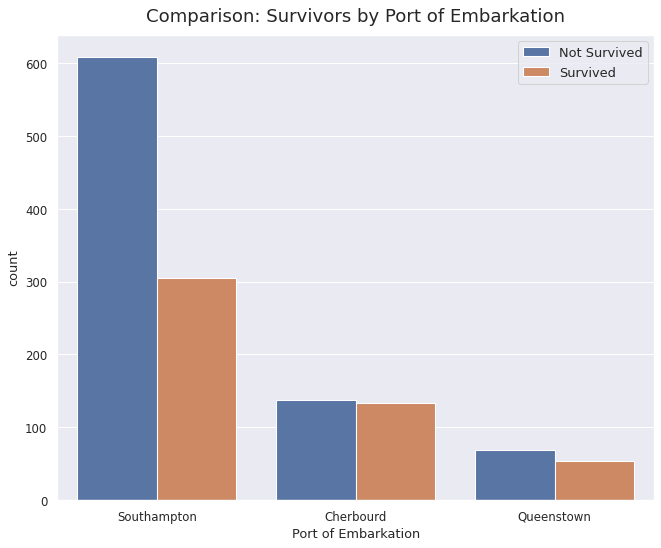

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.8)? Write in your own words in this cell.

Write below:from the above bar plots, we can say that cherbourd has the highest survival chance. However, from the comaprison bar plot we have plotted, we can see that Southampton has a higher number of survived compared to that of the other two. Same observation in case of not survived. So from the overall analysis, we can say that even tho Cherbourd has a higher chance of survival, Southampton port has the highest survivors.

##### 2.3.2.9 Average Age of Passengers with Siblings and  Parents or Children

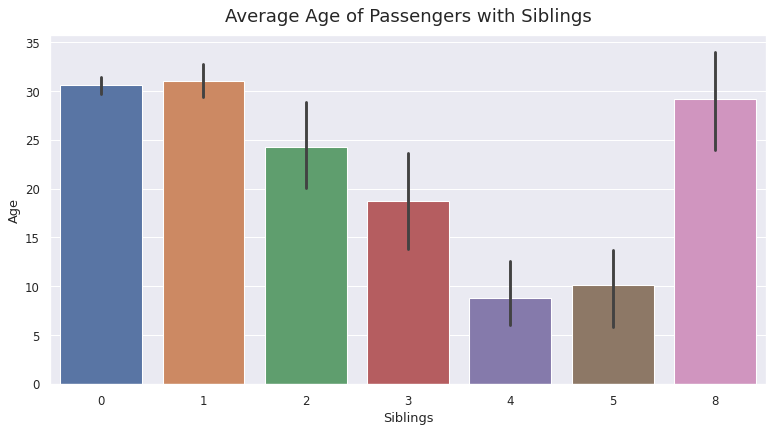

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

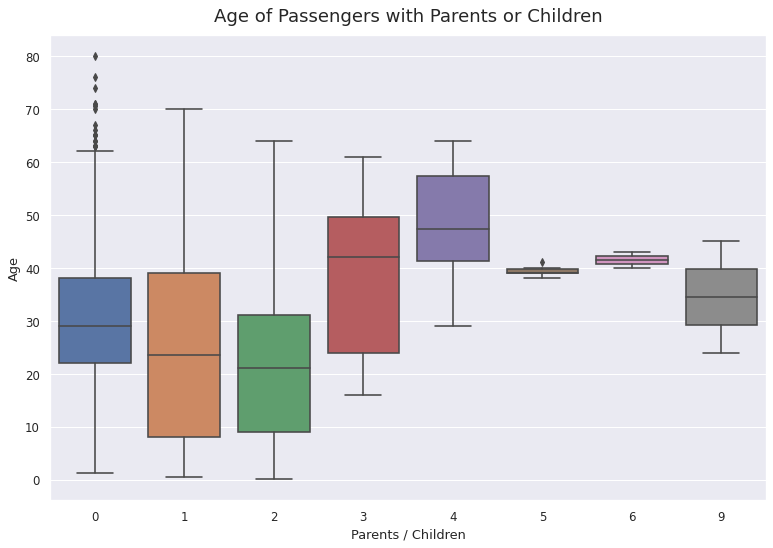

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

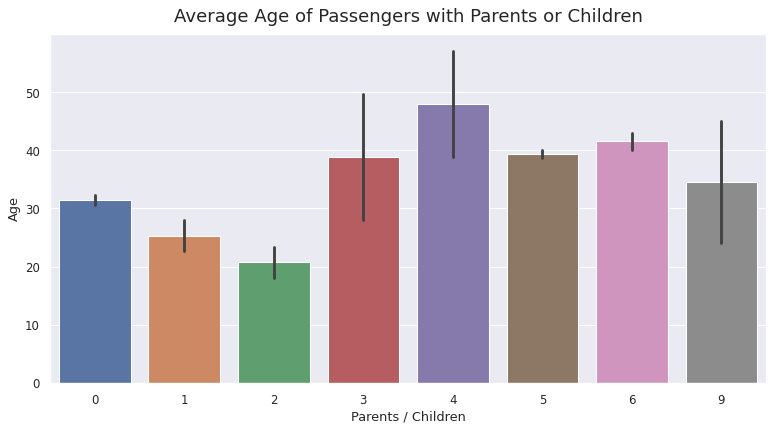

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.9)? Write in your own words in this cell.

Write below:

##### 2.3.2.10 Age of Passengers for each Ticket Class

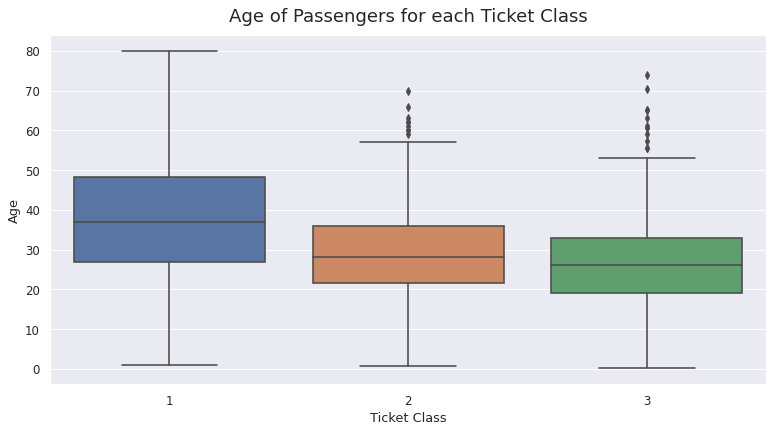

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.10)? Write in your own words in this cell.

Write below: From above, we can see that median od class 1 is the highest comapred to the other two classes. Both class 2 and class 3 has a good amount of outliers and class 1 has the highest maximum as well. Thus, it can be said that passengers' age ranging from 0 to 80 bought class 1 tickets. Age range from around 28 to 50 years old was most of the passengers' age since it is the inter Quartile range of class 1. Class 3 has the lowest median which is about 24 years old. 

##### 2.3.2.11 Comparing multiple columns

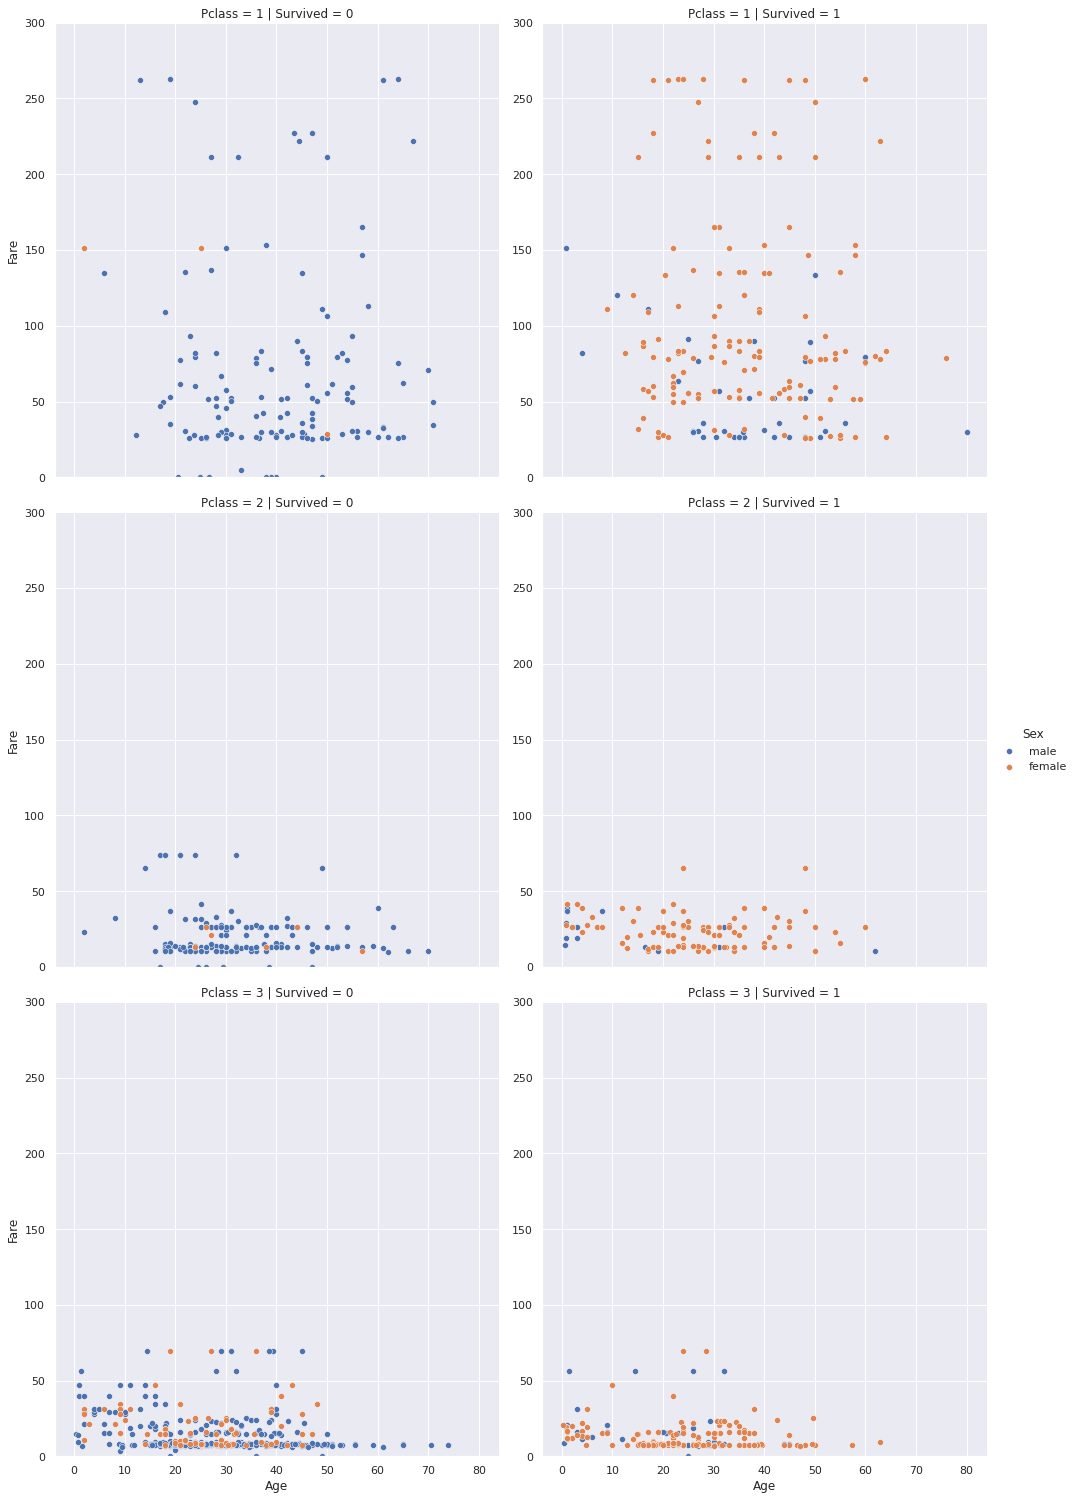

In [ ]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

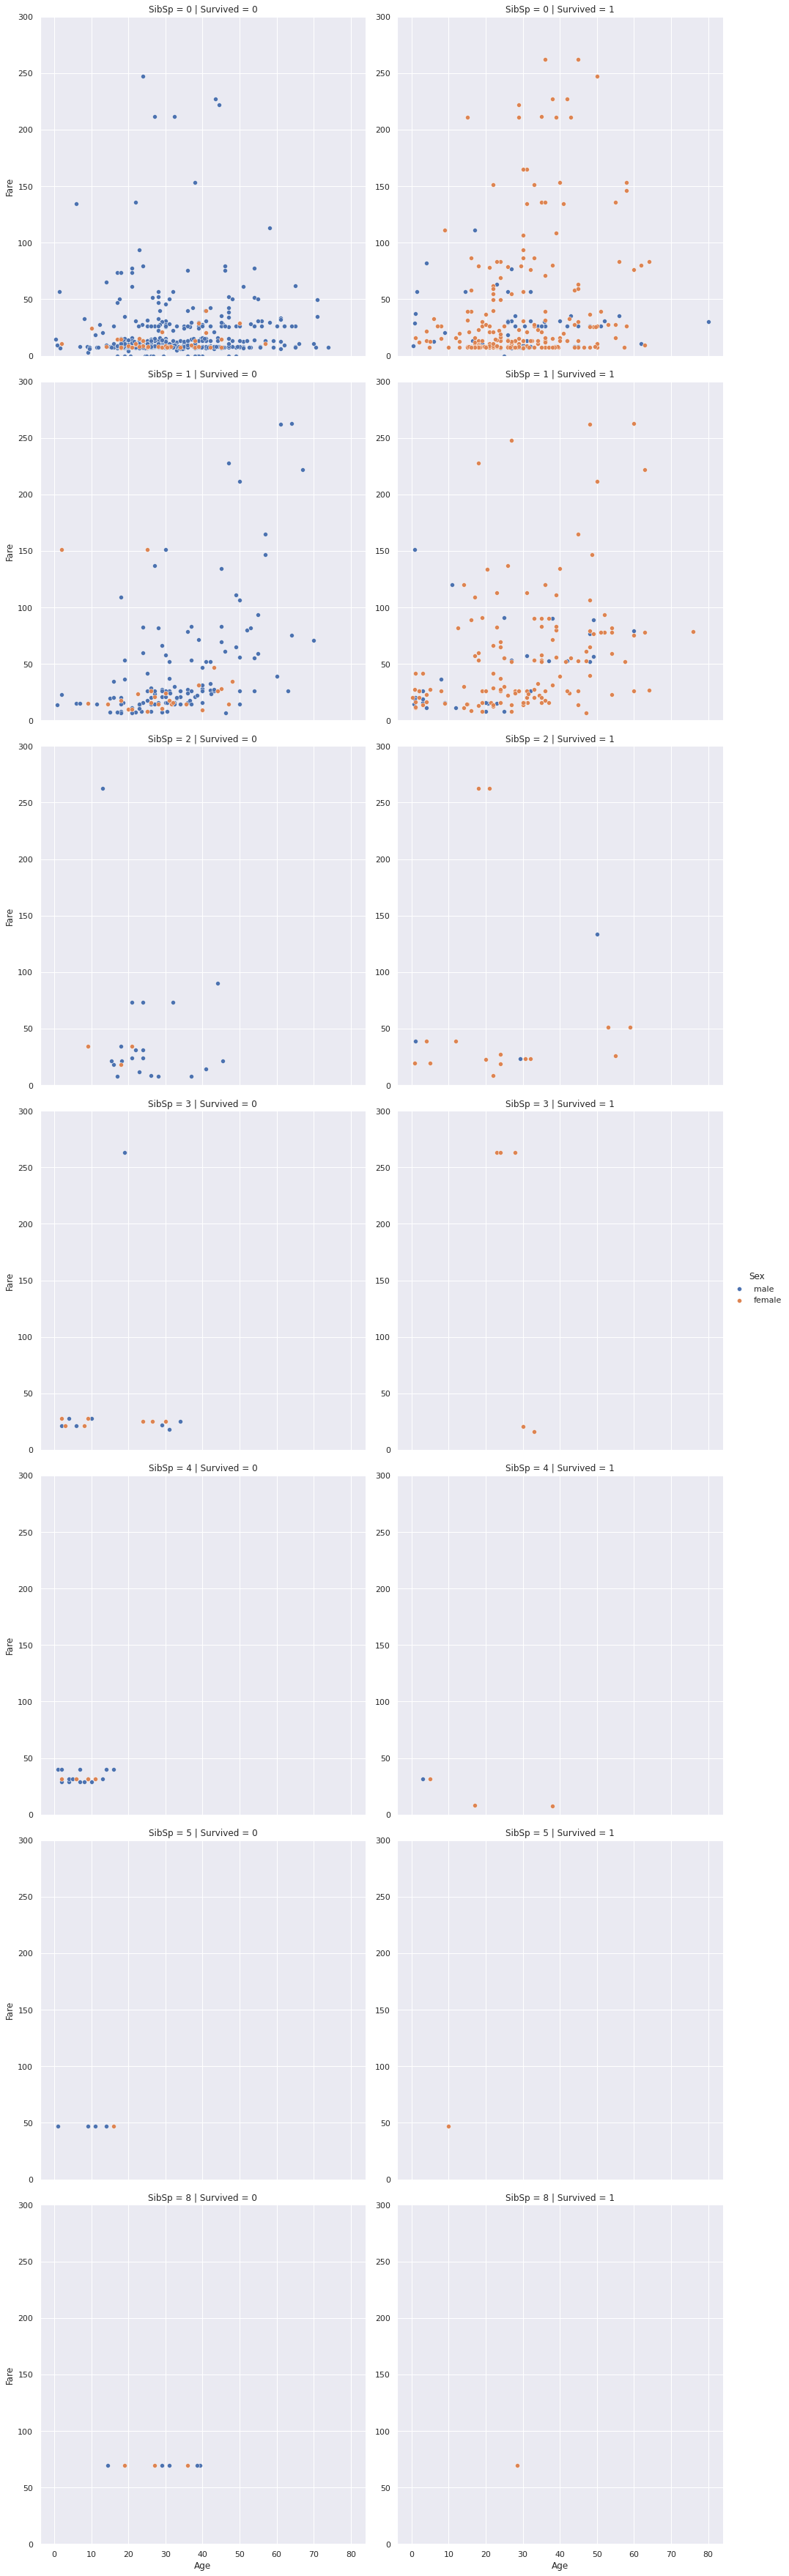

In [ ]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

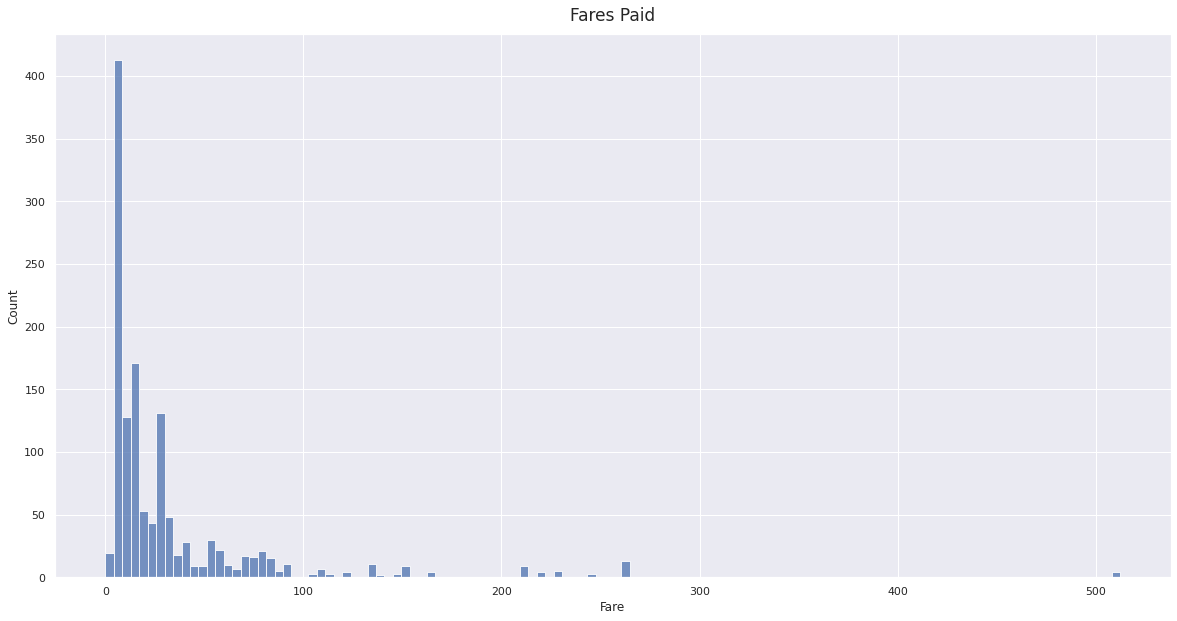

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

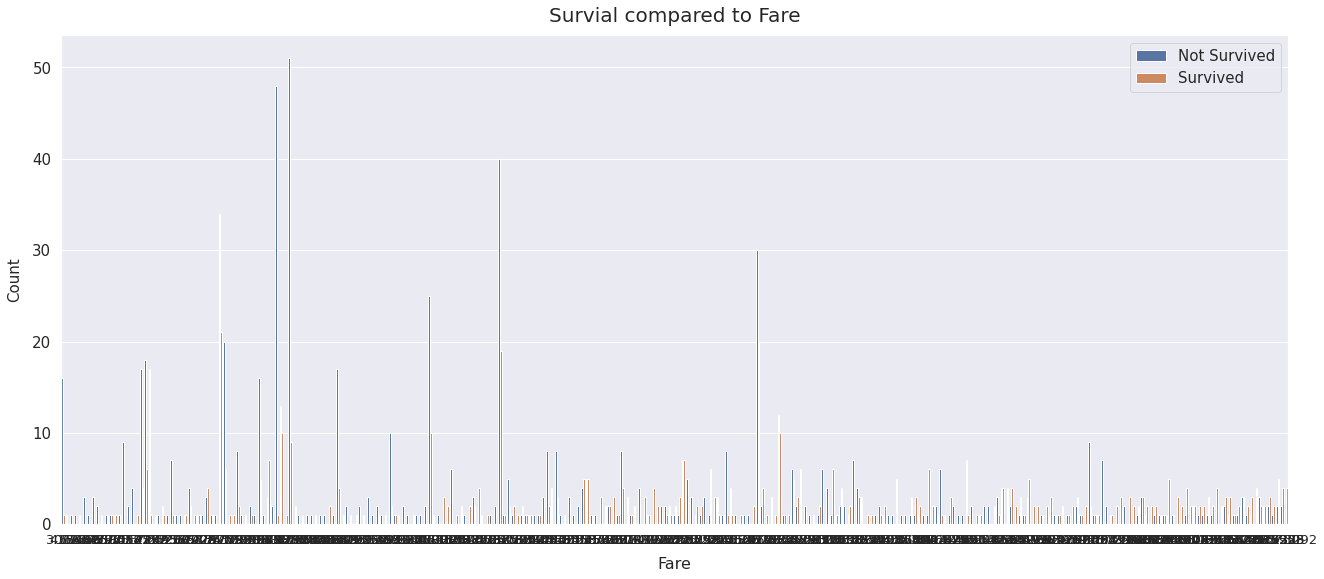

In [ ]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.11)? Write in your own words in this cell.

Write below:

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

For encoding categorical variables you can use pandas (get_dummies).

Convert categorical variable into dummy/indicator variables.

Learn More:


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

**Examples**


In [63]:
train_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [64]:
train1 = train_data.copy()


train1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

train1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [65]:
data1 = train1.copy()

data1 = pd.get_dummies(data1)

data1.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500           0         1   
1         1       1  38.0      1      0  71.2833           1         0   
2         1       3  26.0      0      0   7.9250           1         0   
3         1       1  35.0      1      0  53.1000           1         0   
4         0       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

**Now use the given dataset and perform the data preprocessing steps:**

In [66]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
train1['Sex_Number'] = np.where((train1['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
train1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Sex_Number
0         0       3    male  22.0      1      0   7.2500        S           0
1         1       1  female  38.0      1      0  71.2833        C           1
2         1       3  female  26.0      0      0   7.9250        S           1
3         1       1  female  35.0      1      0  53.1000        S           1
4         0       3    male  35.0      0      0   8.0500        S           0

In [67]:
train1.Embarked [train1.Embarked == 'S'] = 1
train1.Embarked [train1.Embarked == 'C'] = 2
train1.Embarked [train1.Embarked == 'Q'] = 3
train1

<ipython-input-67-82a6d5c241c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.Embarked [train1.Embarked == 'S'] = 1
<ipython-input-67-82a6d5c241c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.Embarked [train1.Embarked == 'C'] = 2
<ipython-input-67-82a6d5c241c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.Embarked [train1.Embarked == 'Q'] = 3


Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0           0       3    male  22.0      1      0   7.2500        1   
1           1       1  female  38.0      1      0  71.2833        2   
2           1       3  female  26.0      0      0   7.9250        1   
3           1       1  female  35.0      1      0  53.1000        1   
4           0       3    male  35.0      0      0   8.0500        1   
..        ...     ...     ...   ...    ...    ...      ...      ...   
886         0       2    male  27.0      0      0  13.0000        1   
887         1       1  female  19.0      0      0  30.0000        1   
888         0       3  female   NaN      1      2  23.4500        1   
889         1       1    male  26.0      0      0  30.0000        2   
890         0       3    male  32.0      0      0   7.7500        3   

     Sex_Number  
0             0  
1             1  
2             1  
3             1  
4             0  
..          ...  
886           0  
887           1  
888           1  
889           0  
890           0  

[891 rows x 9 columns]

In [68]:
train1.Sex [train1.Sex == 'male'] = 0
train1.Sex [train1.Sex == 'female'] = 1

train1


<ipython-input-68-6a0c87740182>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.Sex [train1.Sex == 'male'] = 0
<ipython-input-68-6a0c87740182>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.Sex [train1.Sex == 'female'] = 1


Survived  Pclass Sex   Age  SibSp  Parch     Fare Embarked  Sex_Number
0           0       3   0  22.0      1      0   7.2500        1           0
1           1       1   1  38.0      1      0  71.2833        2           1
2           1       3   1  26.0      0      0   7.9250        1           1
3           1       1   1  35.0      1      0  53.1000        1           1
4           0       3   0  35.0      0      0   8.0500        1           0
..        ...     ...  ..   ...    ...    ...      ...      ...         ...
886         0       2   0  27.0      0      0  13.0000        1           0
887         1       1   1  19.0      0      0  30.0000        1           1
888         0       3   1   NaN      1      2  23.4500        1           1
889         1       1   0  26.0      0      0  30.0000        2           0
890         0       3   0  32.0      0      0   7.7500        3           0

[891 rows x 9 columns]

In [69]:
train1.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
Sex_Number      0
dtype: int64

In [70]:
train1_replaced_missing = train1.fillna(value = df['Age'].mean())
train1_replaced_missing

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  \
0           0       3    0  22.000000      1      0   7.2500       1.0   
1           1       1    1  38.000000      1      0  71.2833       2.0   
2           1       3    1  26.000000      0      0   7.9250       1.0   
3           1       1    1  35.000000      1      0  53.1000       1.0   
4           0       3    0  35.000000      0      0   8.0500       1.0   
..        ...     ...  ...        ...    ...    ...      ...       ...   
886         0       2    0  27.000000      0      0  13.0000       1.0   
887         1       1    1  19.000000      0      0  30.0000       1.0   
888         0       3    1  29.827987      1      2  23.4500       1.0   
889         1       1    0  26.000000      0      0  30.0000       2.0   
890         0       3    0  32.000000      0      0   7.7500       3.0   

     Sex_Number  
0             0  
1             1  
2             1  
3             1  
4             0  
..          ...  
886           0  
887           1  
888           1  
889           0  
890           0  

[891 rows x 9 columns]

In [71]:
train_model = train1_replaced_missing.fillna(value = df['Embarked'].mode())
print(train_model.astype("int"))

     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Sex_Number
0           0       3    0   22      1      0     7         1           0
1           1       1    1   38      1      0    71         2           1
2           1       3    1   26      0      0     7         1           1
3           1       1    1   35      1      0    53         1           1
4           0       3    0   35      0      0     8         1           0
..        ...     ...  ...  ...    ...    ...   ...       ...         ...
886         0       2    0   27      0      0    13         1           0
887         1       1    1   19      0      0    30         1           1
888         0       3    1   29      1      2    23         1           1
889         1       1    0   26      0      0    30         2           0
890         0       3    0   32      0      0     7         3           0

[891 rows x 9 columns]


In [73]:
train_model = train_model.drop("Sex_Number", axis =1)
train_model

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500       1.0
1           1       1    1  38.000000      1      0  71.2833       2.0
2           1       3    1  26.000000      0      0   7.9250       1.0
3           1       1    1  35.000000      1      0  53.1000       1.0
4           0       3    0  35.000000      0      0   8.0500       1.0
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    0  27.000000      0      0  13.0000       1.0
887         1       1    1  19.000000      0      0  30.0000       1.0
888         0       3    1  29.827987      1      2  23.4500       1.0
889         1       1    0  26.000000      0      0  30.0000       2.0
890         0       3    0  32.000000      0      0   7.7500       3.0

[891 rows x 8 columns]

In [72]:
test = pd.read_csv("test.csv")
test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [80]:
test.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

test.head()

Pclass Sex   Age  SibSp  Parch     Fare Embarked
0       3   0  34.5      0      0   7.8292        3
1       3   1  47.0      1      0   7.0000        1
2       2   0  62.0      0      0   9.6875        3
3       3   0  27.0      0      0   8.6625        1
4       3   1  22.0      1      1  12.2875        1

In [79]:
test.Sex [test.Sex == 'male'] = 0
test.Sex [test.Sex == 'female'] = 1


test.Embarked [test.Embarked == 'S'] = 1
test.Embarked [test.Embarked == 'C'] = 2
test.Embarked [test.Embarked == 'Q'] = 3
test

<ipython-input-79-7b4c718735a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Sex [test.Sex == 'male'] = 0
<ipython-input-79-7b4c718735a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Sex [test.Sex == 'female'] = 1
<ipython-input-79-7b4c718735a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Embarked [test.Embarked == 'S'] = 1
<ipython-input-79-7b4c718735a0>:6: SettingWithCopyWarning: 
A value is trying to be s

PassengerId  Pclass                                          Name Sex  \
0            892       3                              Kelly, Mr. James   0   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   1   
2            894       2                     Myles, Mr. Thomas Francis   0   
3            895       3                              Wirz, Mr. Albert   0   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   1   
..           ...     ...                                           ...  ..   
413         1305       3                            Spector, Mr. Woolf   0   
414         1306       1                  Oliva y Ocana, Dona. Fermina   1   
415         1307       3                  Saether, Mr. Simon Sivertsen   0   
416         1308       3                           Ware, Mr. Frederick   0   
417         1309       3                      Peter, Master. Michael J   0   

      Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0    34.5      0      0              330911    7.8292   NaN        3  
1    47.0      1      0              363272    7.0000   NaN        1  
2    62.0      0      0              240276    9.6875   NaN        3  
3    27.0      0      0              315154    8.6625   NaN        1  
4    22.0      1      1             3101298   12.2875   NaN        1  
..    ...    ...    ...                 ...       ...   ...      ...  
413   NaN      0      0           A.5. 3236    8.0500   NaN        1  
414  39.0      0      0            PC 17758  108.9000  C105        2  
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        1  
416   NaN      0      0              359309    8.0500   NaN        1  
417   NaN      1      1                2668   22.3583   NaN        2  

[418 rows x 11 columns]

In [78]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [77]:
test_replaced_age = test.fillna(value = df['Age'].mean())
test_replaced_age

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket      Fare      Cabin  \
0      male  34.500000      0      0              330911    7.8292  29.827987   
1    female  47.000000      1      0              363272    7.0000  29.827987   
2      male  62.000000      0      0              240276    9.6875  29.827987   
3      male  27.000000      0      0              315154    8.6625  29.827987   
4    female  22.000000      1      1             3101298   12.2875  29.827987   
..      ...        ...    ...    ...                 ...       ...        ...   
413    male  29.827987      0      0           A.5. 3236    8.0500  29.827987   
414  female  39.000000      0      0            PC 17758  108.9000       C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262    7.2500  29.827987   
416    male  29.827987      0      0              359309    8.0500  29.827987   
417    male  29.827987      1      1                2668   22.3583  29.827987   

    Embarked  
0          Q  
1          S  
2          Q  
3          S  
4          S  
..       ...  
413        S  
414        C  
415        S  
416        S  
417        C  

[418 rows x 11 columns]

In [98]:
test_replaced_fare = test.fillna(value = df['Fare'].mean())
test_replaced_fare

Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0         3    0  34.500000      0      0    7.8292         3
1         3    1  47.000000      1      0    7.0000         1
2         2    0  62.000000      0      0    9.6875         3
3         3    0  27.000000      0      0    8.6625         1
4         3    1  22.000000      1      1   12.2875         1
..      ...  ...        ...    ...    ...       ...       ...
413       3    0  33.295479      0      0    8.0500         1
414       1    1  39.000000      0      0  108.9000         2
415       3    0  38.500000      0      0    7.2500         1
416       3    0  33.295479      0      0    8.0500         1
417       3    0  33.295479      1      1   22.3583         2

[418 rows x 7 columns]

In [99]:
test_model = test_replaced_fare.astype("int")
test_model

Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         3    0   34      0      0     7         3
1         3    1   47      1      0     7         1
2         2    0   62      0      0     9         3
3         3    0   27      0      0     8         1
4         3    1   22      1      1    12         1
..      ...  ...  ...    ...    ...   ...       ...
413       3    0   33      0      0     8         1
414       1    1   39      0      0   108         2
415       3    0   38      0      0     7         1
416       3    0   33      0      0     8         1
417       3    0   33      1      1    22         2

[418 rows x 7 columns]

In [157]:
updated_titanic_dataset

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
413                                 Spector, Mr. Woolf    male  29.0      0   
414                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
415                       Saether, Mr. Simon Sivertsen    male  38.5      0   
416                                Ware, Mr. Frederick    male  29.0      0   
417                           Peter, Master. Michael J    male  29.0      1   

     Parch              Ticket      Fare Embarked  Sex_Number  
0        0           A/5 21171    7.2500        1           0  
1        0            PC 17599   71.2833        2           1  
2        0    STON/O2. 3101282    7.9250        1           1  
3        0              113803   53.1000        1           1  
4        0              373450    8.0500        1           0  
..     ...                 ...       ...      ...         ...  
413      0           A.5. 3236    8.0500        1           0  
414      0            PC 17758  108.9000        2           1  
415      0  SOTON/O.Q. 3101262    7.2500        1           0  
416      0              359309    8.0500        1           0  
417      1                2668   22.3583        2           0  

[1309 rows x 12 columns]

### **Write Here**

 What do you undersend/find from the analysis above (section 3)? Write in your own words in this cell.



## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

### 4.1 Use Logistic regression to build your ML model for the Titanic dataset.

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy.


In [102]:
# Code Here (Add as many cells as you need)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train_model.drop("Survived", axis =1)
y = train_model["Survived"]

x_test=test_model.iloc[:,0:]

#y_test = test_model["Survived"]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train the model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict labels on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
#y_pred
print(accuracy_score(y_test, y_pred)*100)

79.82062780269058


In [ ]:
Survived_data=pd.DataFrame(y_pred,columns=['Survived'])
print(Survived_data.to_string())

     Survived
0           0
1           0
2           0
3           0
4           1
5           0
6           1
7           0
8           1
9           0
10          0
11          0
12          1
13          0
14          1
15          1
16          0
17          0
18          1
19          0
20          0
21          0
22          0
23          1
24          1
25          0
26          1
27          0
28          0
29          0
30          0
31          0
32          0
33          0
34          0
35          0
36          0
37          1
38          0
39          0
40          0
41          0
42          0
43          1
44          1
45          0
46          0
47          0
48          1
49          0
50          0
51          0
52          1
53          1
54          0
55          0
56          0
57          0
58          0
59          1
60          0
61          0
62          0
63          1
64          1
65          0
66          1
67          0
68          1
69          1
70    

In [ ]:
accuracy_score = logistic_regression.score(X_train, y_train) * 100
print(accuracy_score)

80.24691358024691


In [107]:
updated_titanic_dataset1 = updated_titanic_dataset.drop(['Sex', 'Ticket', 'Name'], axis=1, inplace= False)
updated_titanic_dataset1.astype(int)

PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare  Embarked  \
0              1         0       3   22      1      0     7         1   
1              2         1       1   38      1      0    71         2   
2              3         1       3   26      0      0     7         1   
3              4         1       1   35      1      0    53         1   
4              5         0       3   35      0      0     8         1   
..           ...       ...     ...  ...    ...    ...   ...       ...   
413         1305         0       3   29      0      0     8         1   
414         1306         1       1   39      0      0   108         2   
415         1307         0       3   38      0      0     7         1   
416         1308         0       3   29      0      0     8         1   
417         1309         0       3   29      1      1    22         2   

     Sex_Number  
0             0  
1             1  
2             1  
3             1  
4             0  
..          ...  
413           0  
414           1  
415           0  
416           0  
417           0  

[1309 rows x 9 columns]

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = updated_titanic_dataset1.drop("Survived", axis =1)
y = updated_titanic_dataset1["Survived"]

#x_test=test_model.iloc[:,0:]




# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test
# Train the model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict labels on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
y_pred
print(accuracy_score(y_test, y_pred)*100)

NameError: ignored

In [110]:
accuracy_score = logistic_regression.score(X_train, y_train) * 100
accuracy_score

85.57784145176696

**Write Here**

What do you undersend this above (section 4.1)? Write in your own words in this cell.

### 4.2 First analyse the 'Advertising dataset' as like you have observed in Titanic dataset. Then, use Linear Regression to build your ML model for the Advertising dataset. 

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy. 


In [12]:
# Code Here (Add as many cells as you need)\
df_advertising = pd.read_csv('advertising.csv')
print(df_advertising.to_string())

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
5      8.7   48.9       75.0    7.2
6     57.5   32.8       23.5   11.8
7    120.2   19.6       11.6   13.2
8      8.6    2.1        1.0    4.8
9    199.8    2.6       21.2   15.6
10    66.1    5.8       24.2   12.6
11   214.7   24.0        4.0   17.4
12    23.8   35.1       65.9    9.2
13    97.5    7.6        7.2   13.7
14   204.1   32.9       46.0   19.0
15   195.4   47.7       52.9   22.4
16    67.8   36.6      114.0   12.5
17   281.4   39.6       55.8   24.4
18    69.2   20.5       18.3   11.3
19   147.3   23.9       19.1   14.6
20   218.4   27.7       53.4   18.0
21   237.4    5.1       23.5   17.5
22    13.2   15.9       49.6    5.6
23   228.3   16.9       26.2   20.5
24    62.3   12.6       18.3    9.7
25   262.9    3.5       19.5   17.0
26   142.9   29.3       12.6

In [13]:
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
df_advertising.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [15]:
df_advertising.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [17]:
df_advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

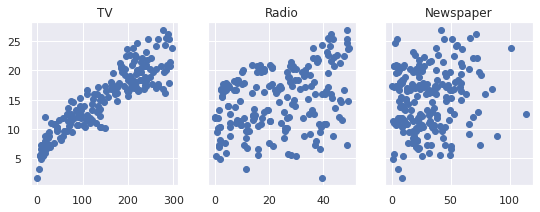

In [18]:
# create a figure and subplot
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

# plot the first subplot
axes[0].scatter(df_advertising["TV"], df_advertising["Sales"])
axes[0].set_title("TV")

# plot the second subplot
axes[1].scatter(df_advertising["Radio"], df_advertising["Sales"])
axes[1].set_title("Radio")

# plot the third subplot
axes[2].scatter(df_advertising["Newspaper"], df_advertising["Sales"])
axes[2].set_title("Newspaper")

# show the plot
plt.show()


In [20]:
df_advertising=df_advertising.astype(int)

In [21]:
ad_corr=df_advertising.corr()
ad_corr

TV     Radio  Newspaper     Sales
TV         1.000000  0.055388   0.055569  0.899568
Radio      0.055388  1.000000   0.352552  0.355736
Newspaper  0.055569  0.352552   1.000000  0.159715
Sales      0.899568  0.355736   0.159715  1.000000

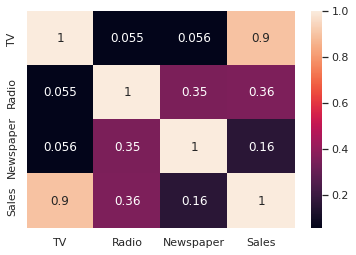

In [22]:
sns.heatmap(ad_corr, annot=True)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

In [24]:
X = df_advertising.drop("Sales", axis =1)
y = df_advertising["Sales"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
lo_advertissing = LogisticRegression(random_state=42)
# Train the model on the training data
lo_advertissing.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lo_advertissing.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)


5.0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
X = df_advertising.drop("Sales", axis =1)
y = df_advertising["Sales"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred1 = LR.predict(X_test)

print(y_pred1)
print("\nCoefficient of Model:")
print(LR.coef_)
print("\nIntercept of Model")
print(LR.intercept_)

[16.62442237 20.03167298 23.29490362  8.8267511  21.3506293  12.24568046
 20.63179419  8.21370213 16.72762028 16.23476343  8.44826791  7.97308911
 17.74532738  7.58745203 12.16801404 14.42309029  7.7564444  17.4502874
 10.58342772 20.0302427  20.43716587 12.23154535 10.53952156 21.98703243
  8.94869626  7.45668301 20.49909044 13.33381048 10.26552129  7.50706404
 15.41148474 10.18476554 20.4440958  10.05256667 21.05058408 20.7818595
 11.79687838 22.34169258 12.10951582  5.93096603]

Coefficient of Model:
[0.05448494 0.10398328 0.00512518]

Intercept of Model
4.253385678307849


In [28]:
%pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp
mse, bias, var = bias_variance_decomp(LR, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ValueError: ignored

**Write Here**

What do you undersend this above (section 4.2)? Write in your own words in this cell.

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models (for both the dataset, provide seperate comparison). Add as many cells as you need.

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

In [ ]:
# Code Here (Add as many cells as you need)
r2_Logistic_advertising = r2_score(y_test, y_pred)
print(r2_Logistic_advertising)

0.3790903141361256


In [142]:
from sklearn.metrics import r2_score 
print("R2 score of Linear Regression Model:")
print("r2 Score",r2_score (y_test,y_pred1))

R2 score of Linear Regression Model:
r2 Score 0.9030010273443586


In [144]:
mae_logistic_advertising = mean_absolute_error(y_test, y_pred)
print(mae_logistic_advertising)

3.425


In [145]:
mse_logistic_advertising = mean_squared_error(y_test, y_pred)
print(mse_logistic_advertising)

18.975


In [143]:
mae_linear_advertising = mean_absolute_error(y_test, y_pred1)
print(mae_linear_advertising)

1.3467880171733024


In [146]:
mse_linear_advertising = mean_squared_error(y_test, y_pred1)
print(mse_linear_advertising)

2.964288604356401


### **Write Here**

# Part B (Analysis of the Assignment dataset you have collected (Choose One dataset))



## 1. Provide an overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models. 

**Write Here**

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need)

### 2.1 Load, View Data and Show Analysis on Rows and Columns 

In [ ]:
# Code Here (Add as many cells as you need)
df_dyslexia = pd.read_csv('dyslexia.csv')
df_dyslexia

Gender Nativelang Otherlang   Age  Clicks1  Hits1  Misses1  Score1  \
0       Male         No       Yes   7.0     10.0   10.0      0.0    10.0   
1     Female        Yes       Yes  13.0     12.0   12.0      0.0    12.0   
2     Female         No       Yes   7.0      6.0    6.0      0.0     6.0   
3     Female         No       Yes   7.0      0.0    0.0      0.0     0.0   
4     Female         No       Yes   8.0      4.0    4.0      0.0     4.0   
...      ...        ...       ...   ...      ...    ...      ...     ...   
3641  Female         No       Yes  15.0     11.0   11.0      0.0    11.0   
3642  Female         No       Yes  15.0     10.0   10.0      0.0    10.0   
3643  Female         No       Yes  15.0     13.0   13.0      0.0    13.0   
3644     NaN        NaN       NaN   NaN      NaN    NaN      NaN     NaN   
3645     NaN        NaN       NaN   NaN      NaN    NaN      NaN     NaN   

      Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
0           1.0        0.0  ...      0.0    0.000000        0.00      17.0   
1           1.0        0.0  ...      4.0    0.114286        0.00      26.0   
2           1.0        0.0  ...      4.0    0.114286        0.00      26.0   
3           0.0        0.0  ...      0.0    0.000000        0.00       1.0   
4           1.0        0.0  ...      1.0   25.000000        0.05      26.0   
...         ...        ...  ...      ...         ...         ...       ...   
3641        1.0        0.0  ...      3.0    0.600000        0.40       4.0   
3642        1.0        0.0  ...      3.0    0.750000        0.25       4.0   
3643        1.0        0.0  ...      4.0    0.670000        0.33       4.0   
3644        NaN        NaN  ...      NaN         NaN         NaN       NaN   
3645        NaN        NaN  ...      NaN         NaN         NaN       NaN   

      Hits32  Misses32  Score32  Accuracy32  Missrate32  Dyslexia  
0        2.0       0.0      2.0    0.117647    0.000000        No  
1        2.0       2.0      2.0    0.076923    0.076923       Yes  
2        1.0       3.0      1.0    0.038462    0.115385        No  
3        0.0       0.0      0.0    0.000000    0.000000        No  
4        2.0       2.0      2.0    0.076923    0.076923        No  
...      ...       ...      ...         ...         ...       ...  
3641     2.0       2.0      2.0    0.500000    0.500000        No  
3642     3.0       1.0      3.0    0.750000    0.250000        No  
3643     3.0       1.0      3.0    0.750000    0.250000        No  
3644     NaN       NaN      NaN         NaN         NaN       NaN  
3645     NaN       NaN      NaN         NaN         NaN       NaN  

[3646 rows x 197 columns]

In [ ]:
df_dyslexia.info()
display('dyslexia', df_dyslexia.head())
df_dyslexia.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Columns: 197 entries, Gender to Dyslexia
dtypes: float64(193), object(4)
memory usage: 5.5+ MB


'dyslexia'

Gender Nativelang Otherlang   Age  Clicks1  Hits1  Misses1  Score1  \
0    Male         No       Yes   7.0     10.0   10.0      0.0    10.0   
1  Female        Yes       Yes  13.0     12.0   12.0      0.0    12.0   
2  Female         No       Yes   7.0      6.0    6.0      0.0     6.0   
3  Female         No       Yes   7.0      0.0    0.0      0.0     0.0   
4  Female         No       Yes   8.0      4.0    4.0      0.0     4.0   

   Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
0        1.0        0.0  ...      0.0    0.000000        0.00      17.0   
1        1.0        0.0  ...      4.0    0.114286        0.00      26.0   
2        1.0        0.0  ...      4.0    0.114286        0.00      26.0   
3        0.0        0.0  ...      0.0    0.000000        0.00       1.0   
4        1.0        0.0  ...      1.0   25.000000        0.05      26.0   

   Hits32  Misses32  Score32  Accuracy32  Missrate32  Dyslexia  
0     2.0       0.0      2.0    0.117647    0.000000        No  
1     2.0       2.0      2.0    0.076923    0.076923       Yes  
2     1.0       3.0      1.0    0.038462    0.115385        No  
3     0.0       0.0      0.0    0.000000    0.000000        No  
4     2.0       2.0      2.0    0.076923    0.076923        No  

[5 rows x 197 columns]

Gender Nativelang Otherlang   Age  Clicks1  Hits1  Misses1  Score1  \
3641  Female         No       Yes  15.0     11.0   11.0      0.0    11.0   
3642  Female         No       Yes  15.0     10.0   10.0      0.0    10.0   
3643  Female         No       Yes  15.0     13.0   13.0      0.0    13.0   
3644     NaN        NaN       NaN   NaN      NaN    NaN      NaN     NaN   
3645     NaN        NaN       NaN   NaN      NaN    NaN      NaN     NaN   

      Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
3641        1.0        0.0  ...      3.0        0.60        0.40       4.0   
3642        1.0        0.0  ...      3.0        0.75        0.25       4.0   
3643        1.0        0.0  ...      4.0        0.67        0.33       4.0   
3644        NaN        NaN  ...      NaN         NaN         NaN       NaN   
3645        NaN        NaN  ...      NaN         NaN         NaN       NaN   

      Hits32  Misses32  Score32  Accuracy32  Missrate32  Dyslexia  
3641     2.0       2.0      2.0        0.50        0.50        No  
3642     3.0       1.0      3.0        0.75        0.25        No  
3643     3.0       1.0      3.0        0.75        0.25        No  
3644     NaN       NaN      NaN         NaN         NaN       NaN  
3645     NaN       NaN      NaN         NaN         NaN       NaN  

[5 rows x 197 columns]

In [ ]:
sample_dyslexia = df_dyslexia.sample(frac = 0.15, replace=False)
sample_dyslexia

Gender Nativelang Otherlang   Age  Clicks1  Hits1  Misses1  Score1  \
898     Male        Yes       Yes  10.0      5.0    1.0      1.0     1.0   
2183  Female         No       Yes  12.0      5.0    0.0      2.0     0.0   
2491  Female         No       Yes  13.0      3.0    1.0      0.0     2.0   
432     Male        Yes       Yes  10.0      7.0    7.0      0.0     7.0   
2223    Male         No        No  14.0      5.0    1.0      1.0     1.0   
...      ...        ...       ...   ...      ...    ...      ...     ...   
3232  Female         No       Yes   7.0      8.0    0.0      3.0     0.0   
3532    Male         No       Yes  11.0      9.0    9.0      0.0     9.0   
1767  Female         No       Yes  10.0      5.0    0.0      2.0     0.0   
1284    Male         No       Yes  10.0      2.0    1.0      0.0     1.0   
703     Male        Yes        No  11.0      3.0    1.0      0.0     1.0   

      Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
898    0.200000        0.2  ...      4.0    0.114286    0.000000      16.0   
2183   0.000000        0.4  ...      4.0    0.035088    0.052632      17.0   
2491   0.333333        0.0  ...      4.0    0.114286    0.000000      17.0   
432    1.000000        0.0  ...      4.0    0.114286    0.000000      26.0   
2223   0.200000        0.2  ...      3.0    0.049180    0.081967      17.0   
...         ...        ...  ...      ...         ...         ...       ...   
3232   0.000000      375.0  ...      1.0    0.045455    0.000000      11.0   
3532   1.000000        0.0  ...      2.0    0.051282    0.051282      26.0   
1767   0.000000        0.4  ...      3.0    0.083333    0.027778      17.0   
1284   0.500000        0.0  ...      3.0    0.085714    0.028571      17.0   
703    0.333333        0.0  ...      2.0    0.050000    0.050000      17.0   

      Hits32  Misses32  Score32  Accuracy32  Missrate32  Dyslexia  
898      2.0       1.0      2.0  125.000000    0.062500        No  
2183     1.0       3.0      1.0    0.058824    0.176471        No  
2491     2.0       2.0      2.0    0.117647    0.117647        No  
432      4.0       0.0      4.0    0.153846    0.000000        No  
2223     2.0       2.0      2.0    0.117647    0.117647        No  
...      ...       ...      ...         ...         ...       ...  
3232     0.0       2.0      0.0    0.000000    0.181818        No  
3532     4.0       0.0      4.0    0.153846    0.000000        No  
1767     2.0       2.0      2.0    0.117647    0.117647        No  
1284     1.0       3.0      1.0    0.058824    0.176471        No  
703      0.0       4.0      0.0    0.000000    0.235294        No  

[547 rows x 197 columns]

In [ ]:
#show all column name
list(sample_dyslexia.columns.values.tolist())

['Gender',
 'Nativelang',
 'Otherlang',
 'Age',
 'Clicks1',
 'Hits1',
 'Misses1',
 'Score1',
 'Accuracy1',
 'Missrate1',
 'Clicks2',
 'Hits2',
 'Misses2',
 'Score2',
 'Accuracy2',
 'Missrate2',
 'Clicks3',
 'Hits3',
 'Misses3',
 'Score3',
 'Accuracy3',
 'Missrate3',
 'Clicks4',
 'Hits4',
 'Misses4',
 'Score4',
 'Accuracy4',
 'Missrate4',
 'Clicks5',
 'Hits5',
 'Misses5',
 'Score5',
 'Accuracy5',
 'Missrate5',
 'Clicks6',
 'Hits6',
 'Misses6',
 'Score6',
 'Accuracy6',
 'Missrate6',
 'Clicks7',
 'Hits7',
 'Misses7',
 'Score7',
 'Accuracy7',
 'Missrate7',
 'Clicks8',
 'Hits8',
 'Misses8',
 'Score8',
 'Accuracy8',
 'Missrate8',
 'Clicks9',
 'Hits9',
 'Misses9',
 'Score9',
 'Accuracy9',
 'Missrate9',
 'Clicks10',
 'Hits10',
 'Misses10',
 'Score10',
 'Accuracy10',
 'Missrate10',
 'Clicks11',
 'Hits11',
 'Misses11',
 'Score11',
 'Accuracy11',
 'Missrate11',
 'Clicks12',
 'Hits12',
 'Misses12',
 'Score12',
 'Accuracy12',
 'Missrate12',
 'Clicks13',
 'Hits13',
 'Misses13',
 'Score13',
 'Accurac

In [ ]:
print(len(sample_dyslexia.axes[0]))
print(len(sample_dyslexia.axes[1]))

547
197


In [ ]:
print(len(df_dyslexia.axes[0]))
print(len(df_dyslexia.axes[1]))

3646
197


In [ ]:
print(sample_dyslexia.count())

Gender        547
Nativelang    547
Otherlang     547
Age           547
Clicks1       547
             ... 
Misses32      547
Score32       547
Accuracy32    547
Missrate32    547
Dyslexia      547
Length: 197, dtype: int64


In [ ]:
print(df_dyslexia.count())

Gender        3644
Nativelang    3644
Otherlang     3644
Age           3643
Clicks1       3644
              ... 
Misses32      3644
Score32       3644
Accuracy32    3644
Missrate32    3644
Dyslexia      3644
Length: 197, dtype: int64


In [ ]:
print(sample_dyslexia.nunique().to_string())

Gender         2
Nativelang     2
Otherlang      2
Age           11
Clicks1       25
Hits1         19
Misses1        8
Score1        19
Accuracy1     24
Missrate1     30
Clicks2       32
Hits2         17
Misses2       15
Score2        17
Accuracy2     56
Missrate2     59
Clicks3       36
Hits3         14
Misses3       10
Score3        15
Accuracy3     61
Missrate3     55
Clicks4       27
Hits4         17
Misses4       19
Score4        28
Accuracy4     58
Missrate4     58
Clicks5       27
Hits5         17
Misses5       24
Score5        18
Accuracy5     39
Missrate5     39
Clicks6       22
Hits6         17
Misses6       16
Score6        18
Accuracy6     39
Missrate6     39
Clicks7       20
Hits7         19
Misses7       10
Score7        20
Accuracy7     35
Missrate7     35
Clicks8       20
Hits8         11
Misses8       17
Score8        11
Accuracy8     36
Missrate8     36
Clicks9       17
Hits9         11
Misses9       17
Score9        11
Accuracy9     30
Missrate9     30
Clicks10      

In [ ]:
print(df_dyslexia.nunique().to_string())

Gender          2
Nativelang      2
Otherlang       2
Age            11
Clicks1        35
Hits1          20
Misses1        13
Score1         20
Accuracy1      61
Missrate1      70
Clicks2        41
Hits2          18
Misses2        21
Score2         21
Accuracy2     104
Missrate2     104
Clicks3        43
Hits3          16
Misses3        19
Score3         17
Accuracy3     111
Missrate3     111
Clicks4        38
Hits4          25
Misses4        25
Score4         38
Accuracy4     112
Missrate4     112
Clicks5        62
Hits5          23
Misses5        57
Score5         24
Accuracy5      98
Missrate5      98
Clicks6        35
Hits6          20
Misses6        30
Score6         23
Accuracy6      91
Missrate6      90
Clicks7        27
Hits7          21
Misses7        19
Score7         22
Accuracy7      68
Missrate7      68
Clicks8        42
Hits8          14
Misses8        38
Score8         14
Accuracy8      82
Missrate8      82
Clicks9        30
Hits9          14
Misses9        30
Score9    

In [ ]:
sample_dyslexia.shape

(547, 197)

In [ ]:
df_dyslexia.shape

(3646, 197)

### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
# Code Here (Add as many cells as you need)
print(sample_dyslexia.duplicated().any())


False


In [ ]:
print(df_dyslexia.duplicated().to_string())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

#### Identifying missing values


In [ ]:
# Code Here (Add as many cells as you need)
print(sample_dyslexia.isnull().sum().to_string())

Gender        0
Nativelang    0
Otherlang     0
Age           0
Clicks1       0
Hits1         0
Misses1       0
Score1        0
Accuracy1     0
Missrate1     0
Clicks2       0
Hits2         0
Misses2       0
Score2        0
Accuracy2     0
Missrate2     0
Clicks3       0
Hits3         0
Misses3       0
Score3        0
Accuracy3     0
Missrate3     0
Clicks4       0
Hits4         0
Misses4       0
Score4        0
Accuracy4     0
Missrate4     0
Clicks5       0
Hits5         0
Misses5       0
Score5        0
Accuracy5     0
Missrate5     0
Clicks6       0
Hits6         0
Misses6       0
Score6        0
Accuracy6     0
Missrate6     0
Clicks7       0
Hits7         0
Misses7       0
Score7        0
Accuracy7     0
Missrate7     0
Clicks8       0
Hits8         0
Misses8       0
Score8        0
Accuracy8     0
Missrate8     0
Clicks9       0
Hits9         0
Misses9       0
Score9        0
Accuracy9     0
Missrate9     0
Clicks10      0
Hits10        0
Misses10      0
Score10       0
Accuracy

In [ ]:
print(df_dyslexia.isnull().sum().to_string())

Gender        2
Nativelang    2
Otherlang     2
Age           3
Clicks1       2
Hits1         2
Misses1       2
Score1        2
Accuracy1     2
Missrate1     2
Clicks2       2
Hits2         2
Misses2       2
Score2        2
Accuracy2     2
Missrate2     2
Clicks3       2
Hits3         2
Misses3       2
Score3        2
Accuracy3     2
Missrate3     2
Clicks4       2
Hits4         2
Misses4       2
Score4        2
Accuracy4     2
Missrate4     2
Clicks5       2
Hits5         2
Misses5       2
Score5        2
Accuracy5     2
Missrate5     2
Clicks6       2
Hits6         2
Misses6       2
Score6        2
Accuracy6     2
Missrate6     2
Clicks7       2
Hits7         2
Misses7       2
Score7        2
Accuracy7     2
Missrate7     2
Clicks8       2
Hits8         2
Misses8       2
Score8        2
Accuracy8     2
Missrate8     2
Clicks9       2
Hits9         2
Misses9       2
Score9        2
Accuracy9     2
Missrate9     2
Clicks10      2
Hits10        2
Misses10      2
Score10       2
Accuracy

#### Visualisation of missing data


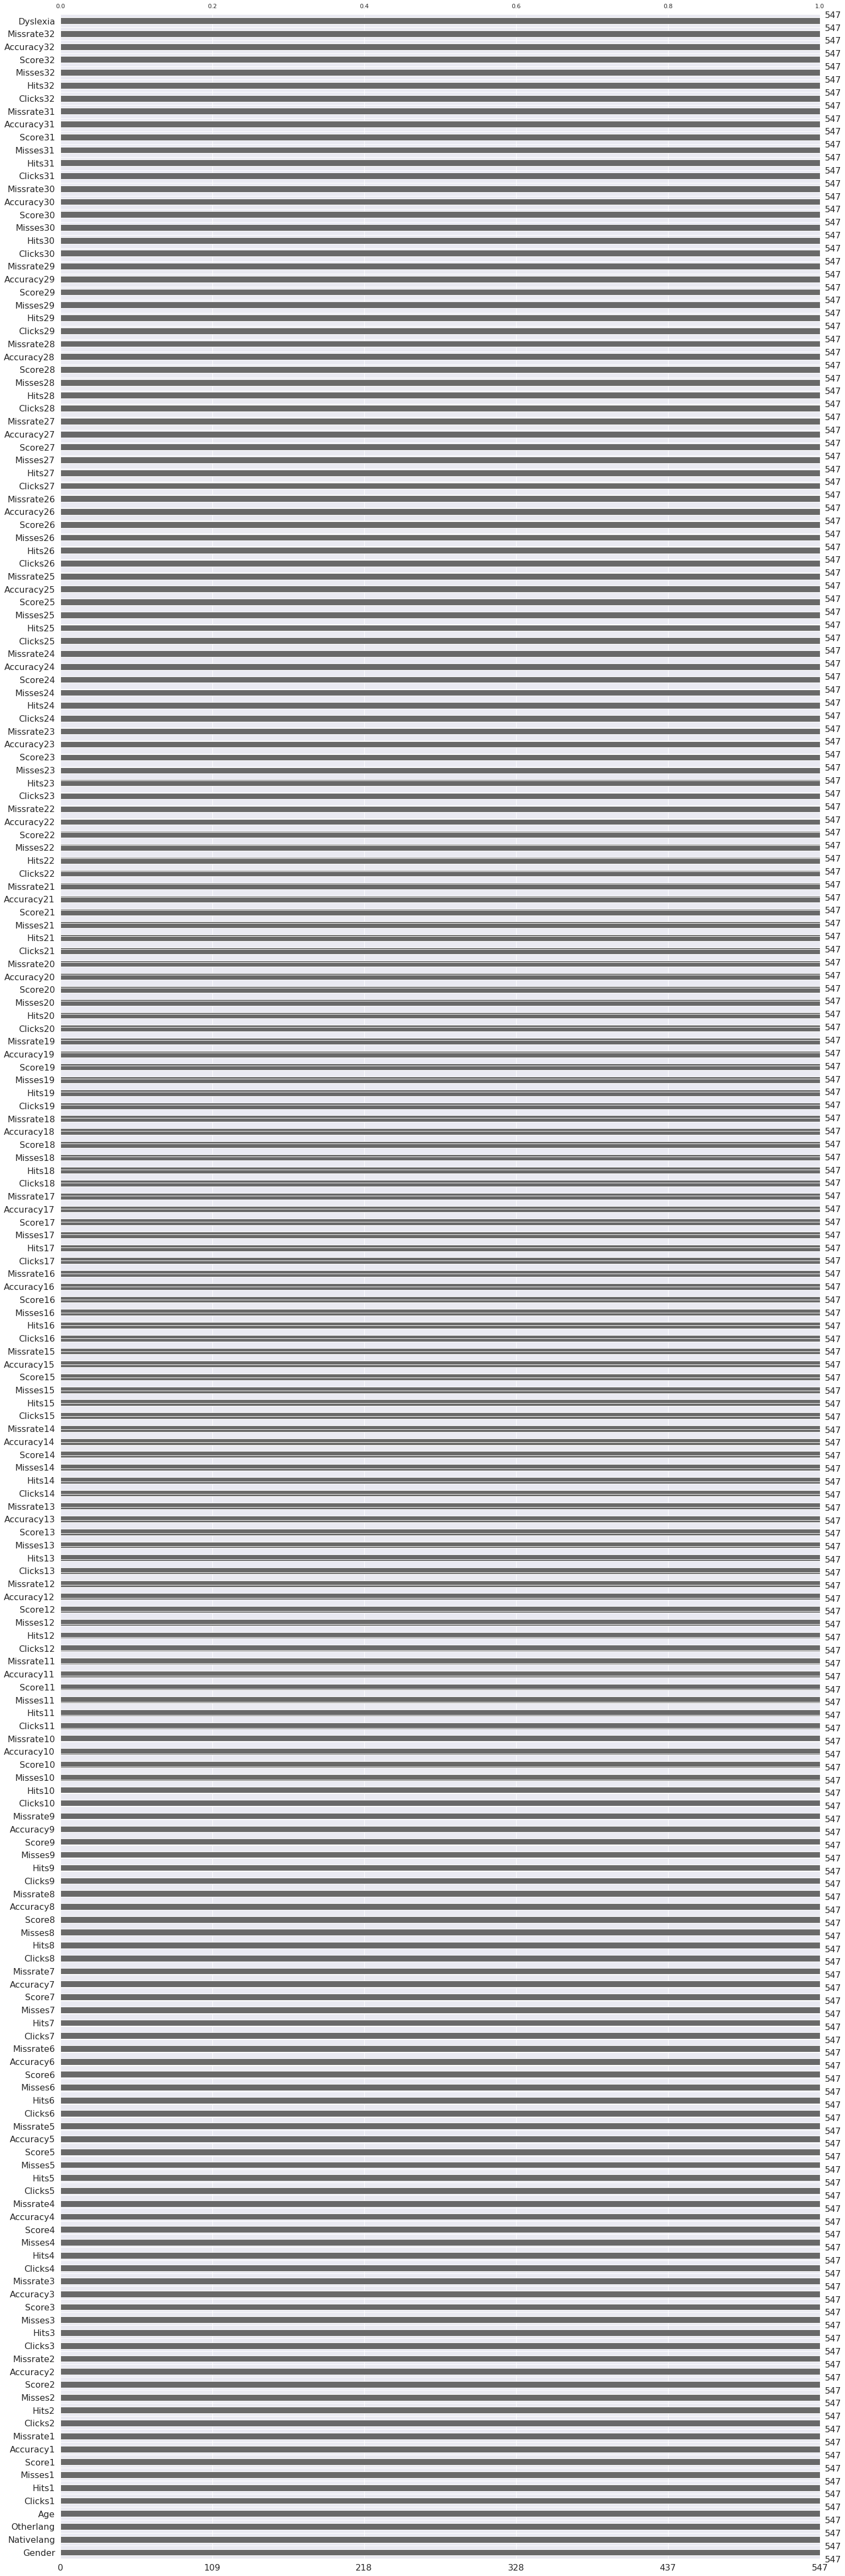

In [ ]:
# Code Here (Add as many cells as you need)
import missingno as msno
msno.bar(sample_dyslexia)

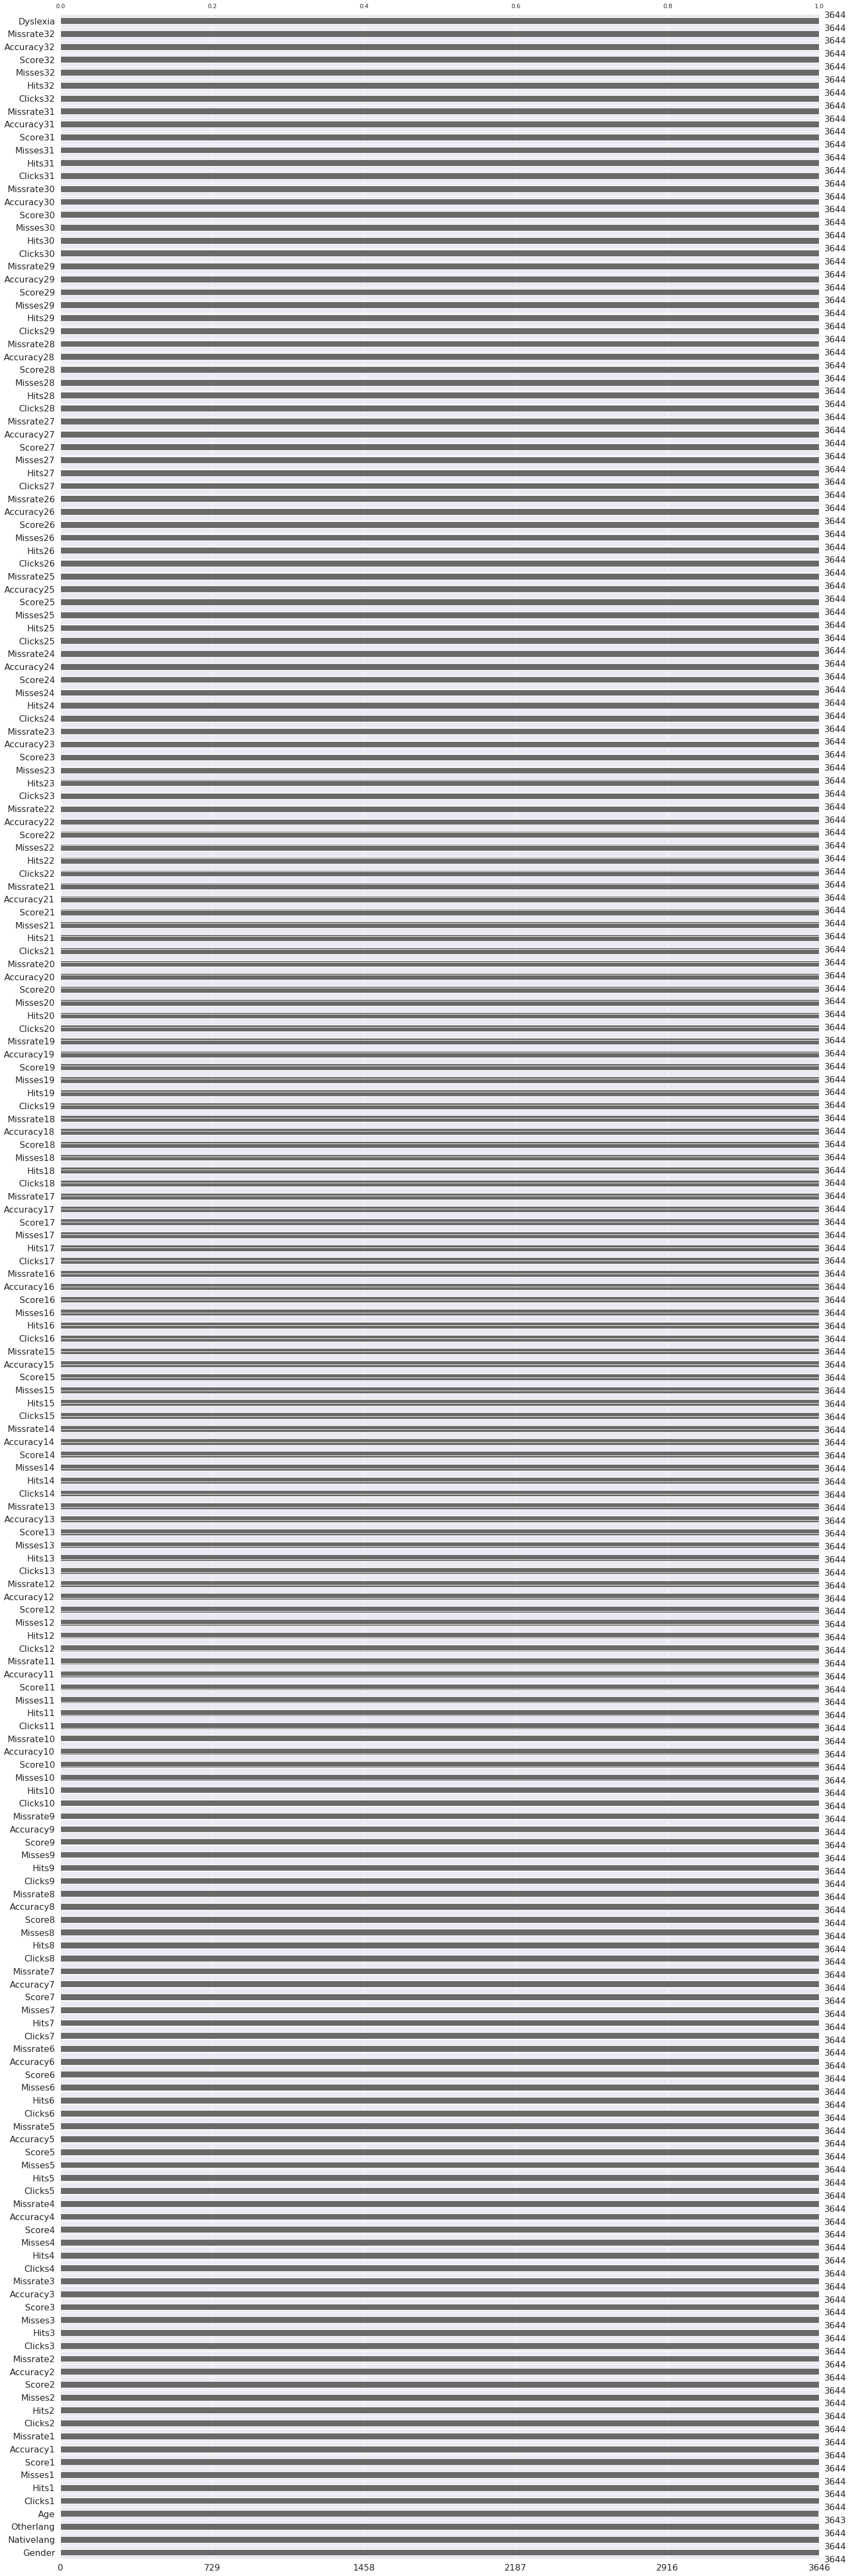

In [ ]:
msno.bar(df_dyslexia)

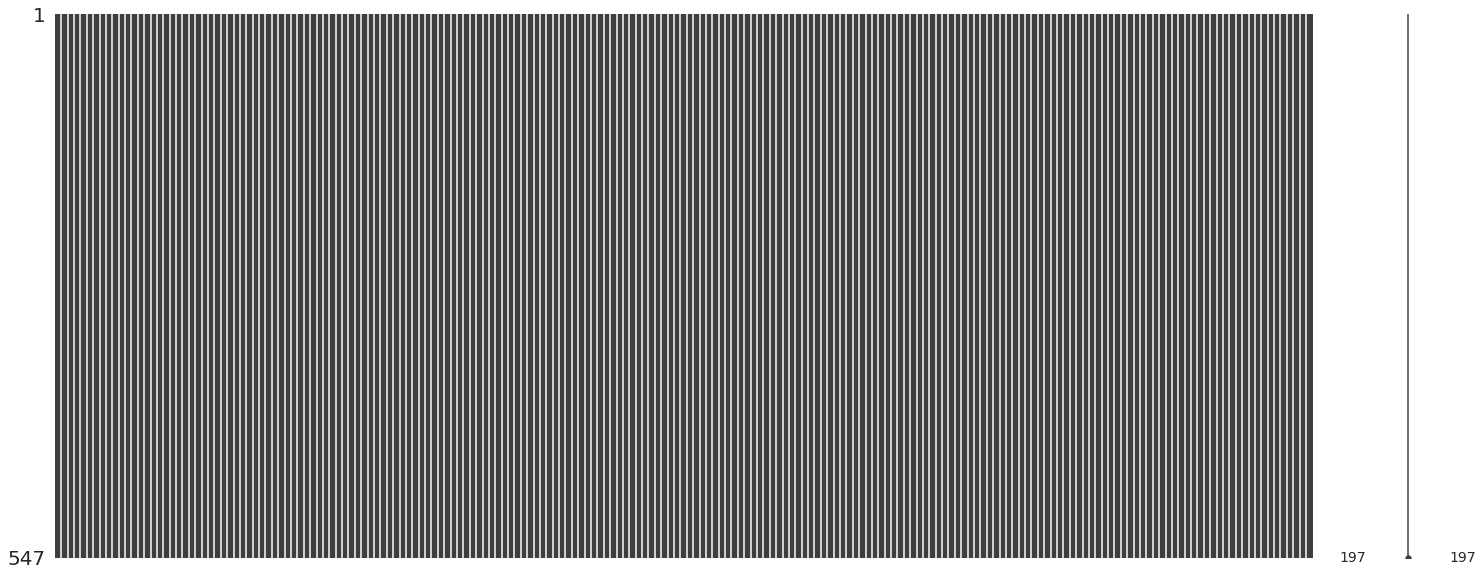

In [ ]:
msno.matrix(sample_dyslexia)

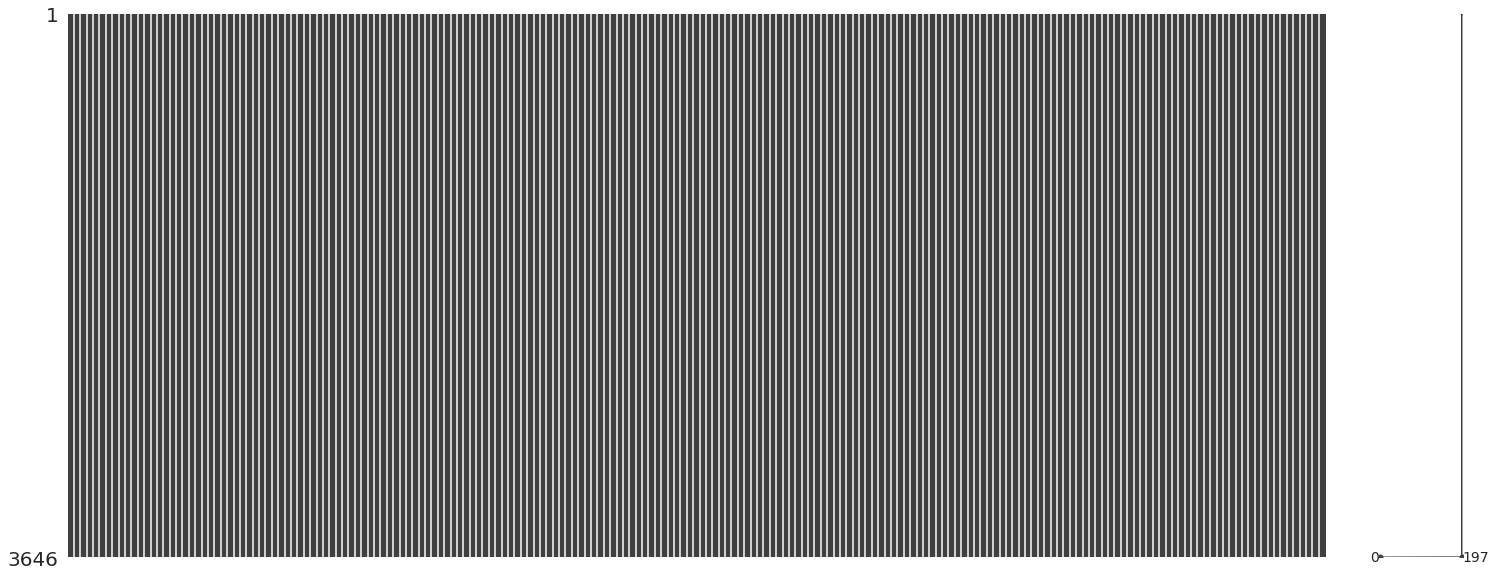

In [ ]:
msno.matrix(df_dyslexia)

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


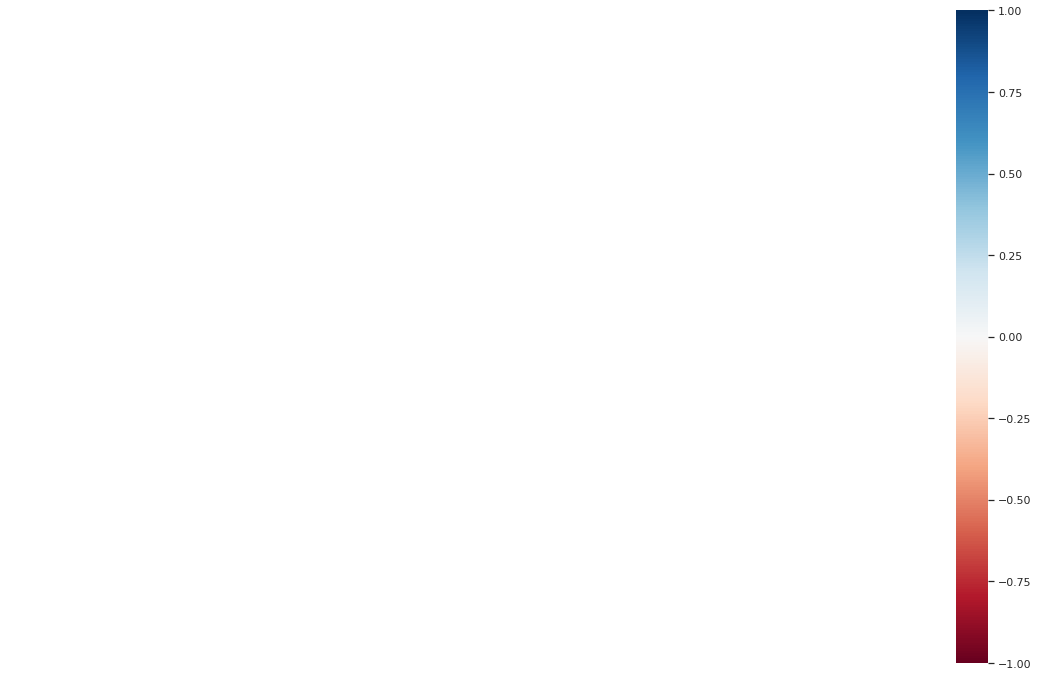

In [ ]:
msno.heatmap(sample_dyslexia)

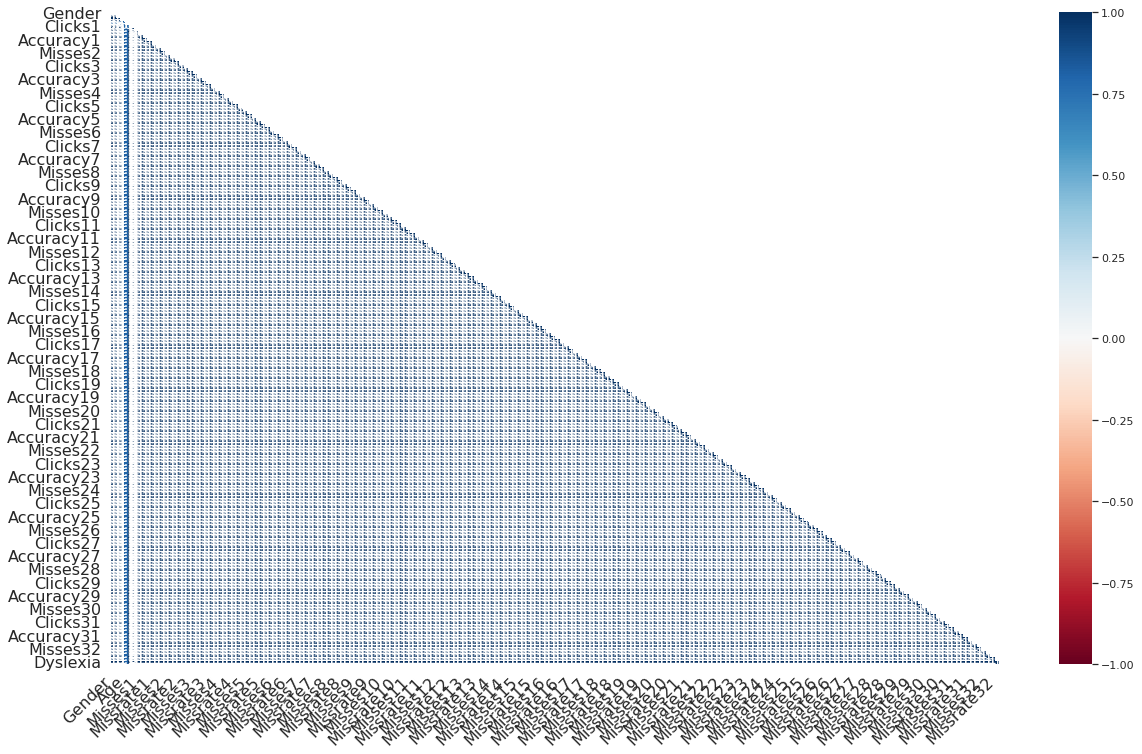

In [ ]:
msno.heatmap(df_dyslexia)

#### Dealing with missing values (How would you deal with missing values?) (Columns with missing data)



1.   Do analysis using plots

2.   Provide an appropriate discussion




In [ ]:
# Code Here (Add as many cells as you need)
missing_percentage_dys_sam = sample_dyslexia.isnull().sum()*100/len(sample_dyslexia)
print(missing_percentage_dys_sam.to_string())

Gender        0.0
Nativelang    0.0
Otherlang     0.0
Age           0.0
Clicks1       0.0
Hits1         0.0
Misses1       0.0
Score1        0.0
Accuracy1     0.0
Missrate1     0.0
Clicks2       0.0
Hits2         0.0
Misses2       0.0
Score2        0.0
Accuracy2     0.0
Missrate2     0.0
Clicks3       0.0
Hits3         0.0
Misses3       0.0
Score3        0.0
Accuracy3     0.0
Missrate3     0.0
Clicks4       0.0
Hits4         0.0
Misses4       0.0
Score4        0.0
Accuracy4     0.0
Missrate4     0.0
Clicks5       0.0
Hits5         0.0
Misses5       0.0
Score5        0.0
Accuracy5     0.0
Missrate5     0.0
Clicks6       0.0
Hits6         0.0
Misses6       0.0
Score6        0.0
Accuracy6     0.0
Missrate6     0.0
Clicks7       0.0
Hits7         0.0
Misses7       0.0
Score7        0.0
Accuracy7     0.0
Missrate7     0.0
Clicks8       0.0
Hits8         0.0
Misses8       0.0
Score8        0.0
Accuracy8     0.0
Missrate8     0.0
Clicks9       0.0
Hits9         0.0
Misses9       0.0
Score9    

In [ ]:
missing_percentage_dys = df_dyslexia.isnull().sum()*100/len(df_dyslexia)
print(missing_percentage_dys.to_string())

Gender        0.054855
Nativelang    0.054855
Otherlang     0.054855
Age           0.082282
Clicks1       0.054855
Hits1         0.054855
Misses1       0.054855
Score1        0.054855
Accuracy1     0.054855
Missrate1     0.054855
Clicks2       0.054855
Hits2         0.054855
Misses2       0.054855
Score2        0.054855
Accuracy2     0.054855
Missrate2     0.054855
Clicks3       0.054855
Hits3         0.054855
Misses3       0.054855
Score3        0.054855
Accuracy3     0.054855
Missrate3     0.054855
Clicks4       0.054855
Hits4         0.054855
Misses4       0.054855
Score4        0.054855
Accuracy4     0.054855
Missrate4     0.054855
Clicks5       0.054855
Hits5         0.054855
Misses5       0.054855
Score5        0.054855
Accuracy5     0.054855
Missrate5     0.054855
Clicks6       0.054855
Hits6         0.054855
Misses6       0.054855
Score6        0.054855
Accuracy6     0.054855
Missrate6     0.054855
Clicks7       0.054855
Hits7         0.054855
Misses7       0.054855
Score7     

In [ ]:
update_dyslexia = df_dyslexia.drop([df_dyslexia.index[3644], df_dyslexia.index[3645]])
update_dyslexia

Gender Nativelang Otherlang   Age  Clicks1  Hits1  Misses1  Score1  \
0       Male         No       Yes   7.0     10.0   10.0      0.0    10.0   
1     Female        Yes       Yes  13.0     12.0   12.0      0.0    12.0   
2     Female         No       Yes   7.0      6.0    6.0      0.0     6.0   
3     Female         No       Yes   7.0      0.0    0.0      0.0     0.0   
4     Female         No       Yes   8.0      4.0    4.0      0.0     4.0   
...      ...        ...       ...   ...      ...    ...      ...     ...   
3639    Male         No        No  10.0      7.0    7.0      0.0     7.0   
3640  Female         No       Yes  15.0      9.0    9.0      0.0     9.0   
3641  Female         No       Yes  15.0     11.0   11.0      0.0    11.0   
3642  Female         No       Yes  15.0     10.0   10.0      0.0    10.0   
3643  Female         No       Yes  15.0     13.0   13.0      0.0    13.0   

      Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
0           1.0        0.0  ...      0.0    0.000000        0.00      17.0   
1           1.0        0.0  ...      4.0    0.114286        0.00      26.0   
2           1.0        0.0  ...      4.0    0.114286        0.00      26.0   
3           0.0        0.0  ...      0.0    0.000000        0.00       1.0   
4           1.0        0.0  ...      1.0   25.000000        0.05      26.0   
...         ...        ...  ...      ...         ...         ...       ...   
3639        1.0        0.0  ...      2.0    0.670000        0.33       4.0   
3640        1.0        0.0  ...      3.0    0.750000        0.25       4.0   
3641        1.0        0.0  ...      3.0    0.600000        0.40       4.0   
3642        1.0        0.0  ...      3.0    0.750000        0.25       4.0   
3643        1.0        0.0  ...      4.0    0.670000        0.33       4.0   

      Hits32  Misses32  Score32  Accuracy32  Missrate32  Dyslexia  
0        2.0       0.0      2.0    0.117647    0.000000        No  
1        2.0       2.0      2.0    0.076923    0.076923       Yes  
2        1.0       3.0      1.0    0.038462    0.115385        No  
3        0.0       0.0      0.0    0.000000    0.000000        No  
4        2.0       2.0      2.0    0.076923    0.076923        No  
...      ...       ...      ...         ...         ...       ...  
3639     1.0       3.0      1.0    0.250000    0.750000       Yes  
3640     2.0       2.0      2.0    0.500000    0.500000        No  
3641     2.0       2.0      2.0    0.500000    0.500000        No  
3642     3.0       1.0      3.0    0.750000    0.250000        No  
3643     3.0       1.0      3.0    0.750000    0.250000        No  

[3644 rows x 197 columns]

In [ ]:
update_dyslexia[update_dyslexia.isna().any(axis=1)]

Gender Nativelang Otherlang  Age  Clicks1  Hits1  Misses1  Score1  \
6  Female         No       Yes  NaN      6.0    6.0      0.0     6.0   

   Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
6        1.0        0.0  ...      4.0    0.114286         0.0      26.0   

   Hits32  Misses32  Score32  Accuracy32  Missrate32  Dyslexia  
6     2.0       2.0      2.0    0.076923    0.076923        No  

[1 rows x 197 columns]

In [ ]:
dyslexia_missing_val_replaced = update_dyslexia.fillna(value = update_dyslexia['Age'].mean().astype('int'))
dyslexia_missing_val_replaced
#dyslexia_missing_val_replaced

Gender Nativelang Otherlang   Age  Clicks1  Hits1  Misses1  Score1  \
0       Male         No       Yes   7.0     10.0   10.0      0.0    10.0   
1     Female        Yes       Yes  13.0     12.0   12.0      0.0    12.0   
2     Female         No       Yes   7.0      6.0    6.0      0.0     6.0   
3     Female         No       Yes   7.0      0.0    0.0      0.0     0.0   
4     Female         No       Yes   8.0      4.0    4.0      0.0     4.0   
...      ...        ...       ...   ...      ...    ...      ...     ...   
3639    Male         No        No  10.0      7.0    7.0      0.0     7.0   
3640  Female         No       Yes  15.0      9.0    9.0      0.0     9.0   
3641  Female         No       Yes  15.0     11.0   11.0      0.0    11.0   
3642  Female         No       Yes  15.0     10.0   10.0      0.0    10.0   
3643  Female         No       Yes  15.0     13.0   13.0      0.0    13.0   

      Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
0           1.0        0.0  ...      0.0    0.000000        0.00      17.0   
1           1.0        0.0  ...      4.0    0.114286        0.00      26.0   
2           1.0        0.0  ...      4.0    0.114286        0.00      26.0   
3           0.0        0.0  ...      0.0    0.000000        0.00       1.0   
4           1.0        0.0  ...      1.0   25.000000        0.05      26.0   
...         ...        ...  ...      ...         ...         ...       ...   
3639        1.0        0.0  ...      2.0    0.670000        0.33       4.0   
3640        1.0        0.0  ...      3.0    0.750000        0.25       4.0   
3641        1.0        0.0  ...      3.0    0.600000        0.40       4.0   
3642        1.0        0.0  ...      3.0    0.750000        0.25       4.0   
3643        1.0        0.0  ...      4.0    0.670000        0.33       4.0   

      Hits32  Misses32  Score32  Accuracy32  Missrate32  Dyslexia  
0        2.0       0.0      2.0    0.117647    0.000000        No  
1        2.0       2.0      2.0    0.076923    0.076923       Yes  
2        1.0       3.0      1.0    0.038462    0.115385        No  
3        0.0       0.0      0.0    0.000000    0.000000        No  
4        2.0       2.0      2.0    0.076923    0.076923        No  
...      ...       ...      ...         ...         ...       ...  
3639     1.0       3.0      1.0    0.250000    0.750000       Yes  
3640     2.0       2.0      2.0    0.500000    0.500000        No  
3641     2.0       2.0      2.0    0.500000    0.500000        No  
3642     3.0       1.0      3.0    0.750000    0.250000        No  
3643     3.0       1.0      3.0    0.750000    0.250000        No  

[3644 rows x 197 columns]

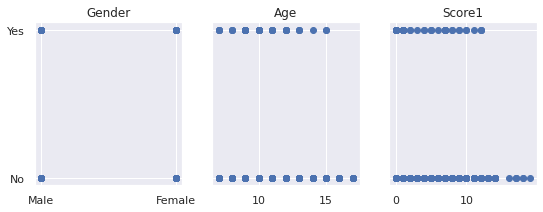

In [ ]:
# create a figure and subplot
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

# plot the first subplot
axes[0].scatter(sample_dyslexia["Gender"], sample_dyslexia["Dyslexia"])
axes[0].set_title("Gender")

# plot the second subplot
axes[1].scatter(sample_dyslexia["Age"], sample_dyslexia["Dyslexia"])
axes[1].set_title("Age")
axes[2].scatter(sample_dyslexia["Score1"], sample_dyslexia["Dyslexia"])
axes[2].set_title("Score1")


# show the plot
plt.show()

### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plot Heat Map

In [ ]:
# Code Here (Add as many cells as you need)

corr_dys1 = sample_dyslexia.groupby('Gender')[['Nativelang','Otherlang', 'Hits1','Misses1','Accuracy1','Clicks1','Score1','Missrate1']].corr()
corr_dys1

Hits1   Misses1  Accuracy1   Clicks1    Score1  Missrate1
Gender                                                                        
Female Hits1      1.000000 -0.532839  -0.045968  0.763164  0.996974  -0.115426
       Misses1   -0.532839  1.000000   0.124837  0.045648 -0.535685   0.307032
       Accuracy1 -0.045968  0.124837   1.000000  0.084161 -0.039724  -0.018841
       Clicks1    0.763164  0.045648   0.084161  1.000000  0.763527   0.083118
       Score1     0.996974 -0.535685  -0.039724  0.763527  1.000000  -0.118513
       Missrate1 -0.115426  0.307032  -0.018841  0.083118 -0.118513   1.000000
Male   Hits1      1.000000 -0.474413  -0.023905  0.283654  0.996249  -0.524316
       Misses1   -0.474413  1.000000   0.060894  0.547638 -0.478426   0.559250
       Accuracy1 -0.023905  0.060894   1.000000  0.015342 -0.026005   0.018514
       Clicks1    0.283654  0.547638   0.015342  1.000000  0.279992  -0.131505
       Score1     0.996249 -0.478426  -0.026005  0.279992  1.000000  -0.528266
       Missrate1 -0.524316  0.559250   0.018514 -0.131505 -0.528266   1.000000

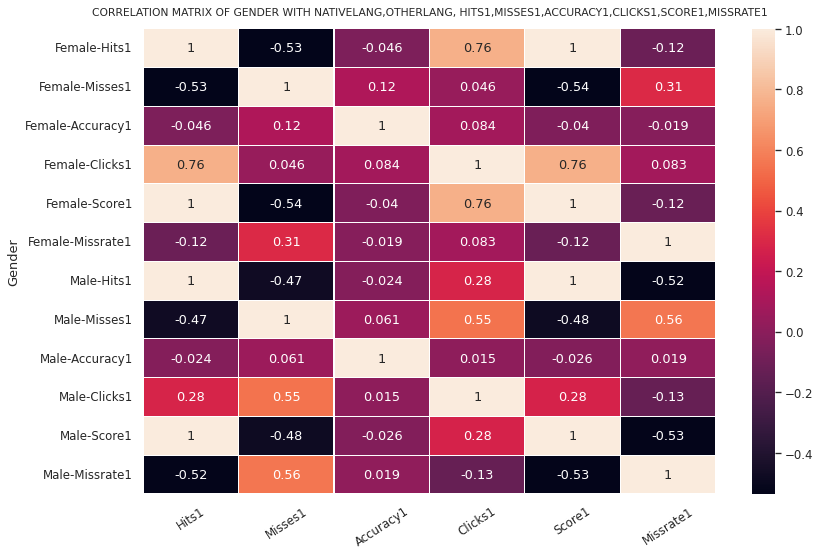

In [ ]:
#heatmap of correlation
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(corr_dys1, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix of Gender with Nativelang,Otherlang, Hits1,Misses1,Accuracy1,Clicks1,Score1,Missrate1'.upper(), size=10, pad=13)
plt.ylabel('Gender')
plt.xticks(rotation=33)
plt.show()

In [ ]:
corr_dys10 = sample_dyslexia.groupby('Gender')[['Nativelang','Otherlang', 'Hits10','Misses10','Accuracy10','Clicks10','Score10','Missrate10']].corr()
corr_dys10

Hits10  Misses10  Accuracy10  Clicks10   Score10  \
Gender                                                                  
Female Hits10      1.000000 -0.420908    0.002715  0.707176  0.999816   
       Misses10   -0.420908  1.000000    0.021858  0.343700 -0.422086   
       Accuracy10  0.002715  0.021858    1.000000  0.019848  0.002608   
       Clicks10    0.707176  0.343700    0.019848  1.000000  0.706067   
       Score10     0.999816 -0.422086    0.002608  0.706067  1.000000   
       Missrate10 -0.106362  0.162359    0.289593  0.016438 -0.106661   
Male   Hits10      1.000000 -0.506468    0.005790  0.820641  0.955919   
       Misses10   -0.506468  1.000000    0.030641  0.077103 -0.487819   
       Accuracy10  0.005790  0.030641    1.000000  0.027001  0.002091   
       Clicks10    0.820641  0.077103    0.027001  1.000000  0.782031   
       Score10     0.955919 -0.487819    0.002091  0.782031  1.000000   
       Missrate10 -0.021851  0.069245    0.809627  0.020625 -0.023730   

                   Missrate10  
Gender                         
Female Hits10       -0.106362  
       Misses10      0.162359  
       Accuracy10    0.289593  
       Clicks10      0.016438  
       Score10      -0.106661  
       Missrate10    1.000000  
Male   Hits10       -0.021851  
       Misses10      0.069245  
       Accuracy10    0.809627  
       Clicks10      0.020625  
       Score10      -0.023730  
       Missrate10    1.000000

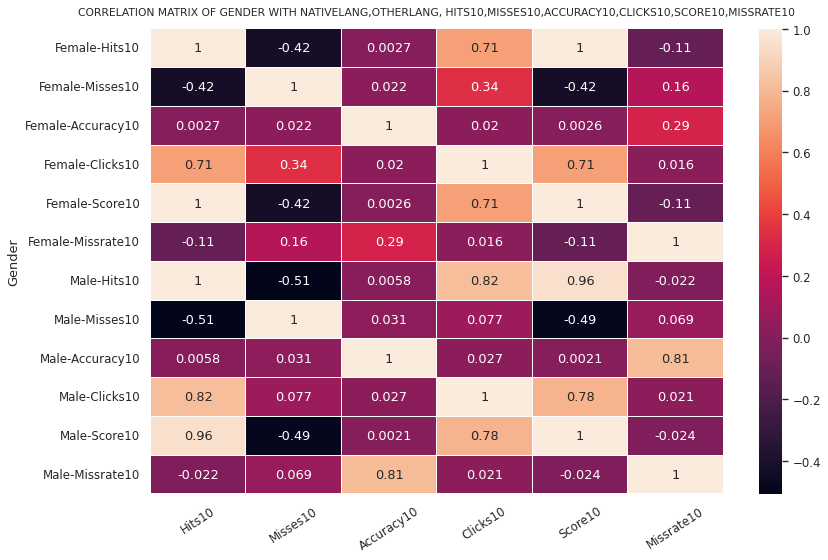

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(corr_dys10, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix of Gender with Nativelang,Otherlang, Hits10,Misses10,Accuracy10,Clicks10,Score10,Missrate10'.upper(), size=10, pad=13)
plt.ylabel('Gender')
plt.xticks(rotation=33)
plt.show()

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


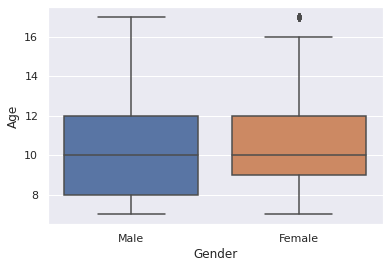

In [ ]:
import seaborn as sns
# Select the cmns to plot
x = df_dyslexia['Gender']
y = df_dyslexia['Age']

# Create the plot
sns.boxplot(x, y)

# Show the plot
plt.show()

In [ ]:
Gender_count1=df_dyslexia.Gender.value_counts().to_frame()
Gender_count1

Gender
Male      1851
Female    1793

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


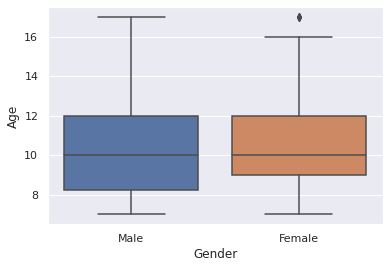

In [ ]:
import seaborn as sns
# Select the cmns to plot
x = sample_dyslexia['Gender']
y = sample_dyslexia['Age']

# Create the plot
sns.boxplot(x, y)

# Show the plot
plt.show()

In [ ]:
Gender_count=sample_dyslexia.Gender.value_counts().to_frame()
Gender_count

Gender
Male       290
Female     257

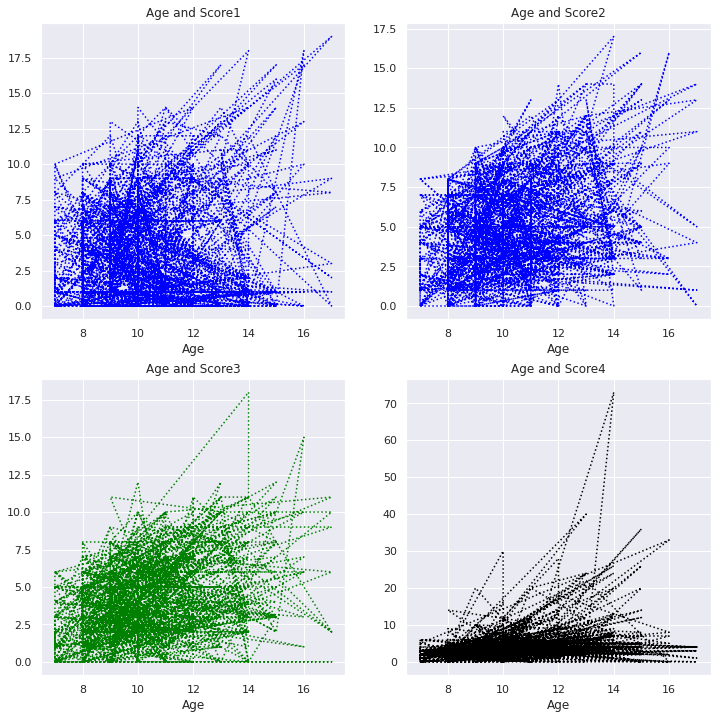

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 12))
sample_dyslexia.plot(x='Age', y='Score1', ax=axes[0,0],linestyle = ":", color='blue',title="Age and Score1",legend=False)
sample_dyslexia.plot(x='Age', y='Score2', ax=axes[0,1],linestyle = ":", color='blue',title="Age and Score2",legend=False)
sample_dyslexia.plot(x='Age', y='Score3', ax=axes[1,0], color='green',linestyle = ":",title="Age and Score3",legend=False)
sample_dyslexia.plot(x='Age', y='Score4',ax=axes[1,1], color='black',linestyle = ":",title="Age and Score4",legend=False)

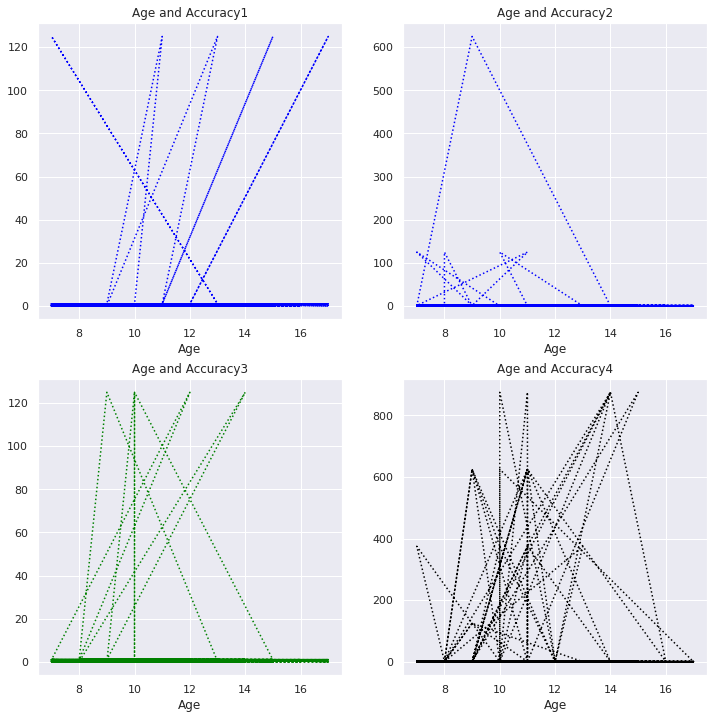

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 12))
sample_dyslexia.plot(x='Age', y='Accuracy1', ax=axes[0,0],linestyle = ":", color='blue',title="Age and Accuracy1",legend=False)
sample_dyslexia.plot(x='Age', y='Accuracy2', ax=axes[0,1],linestyle = ":", color='blue',title="Age and Accuracy2",legend=False)
sample_dyslexia.plot(x='Age', y='Accuracy3', ax=axes[1,0], color='green',linestyle = ":",title="Age and Accuracy3",legend=False)
sample_dyslexia.plot(x='Age', y='Accuracy4',ax=axes[1,1], color='black',linestyle = ":",title="Age and Accuracy4",legend=False)

#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



In [ ]:
native_count=sample_dyslexia.Nativelang.value_counts().to_frame()
native_count

Nativelang
No          399
Yes         148

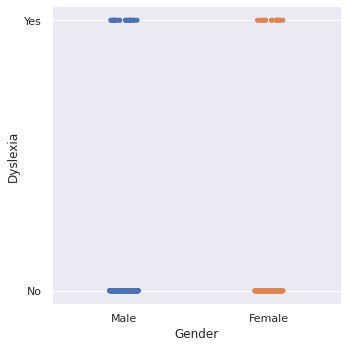

In [ ]:
# Code Here (Add as many cells as you need)
sns.catplot(data=sample_dyslexia, x="Gender", y="Dyslexia")

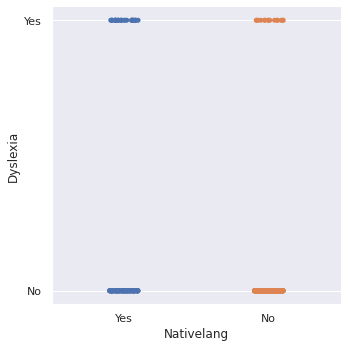

In [ ]:
sns.catplot(data=sample_dyslexia, x="Nativelang", y="Dyslexia")

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

In [ ]:
# Code Here (Add as many cells as you need)
data_dyslexia = sample_dyslexia.copy()
#data_dyslexia['Gender']=data_dyslexia.Gender.map({'Male': 1, 'Female': 0})
data_dyslexia['Dyslexia']=data_dyslexia.Dyslexia.map({'No': 0, 'Yes': 1})
data_dyslexia['Nativelang']=data_dyslexia.Nativelang.map({'No': 0, 'Yes': 1})
data_dyslexia['Otherlang']=data_dyslexia.Otherlang.map({'No': 0, 'Yes': 1})
data_dyslexia

Gender  Nativelang  Otherlang   Age  Clicks1  Hits1  Misses1  Score1  \
898     Male           1          1  10.0      5.0    1.0      1.0     1.0   
2183  Female           0          1  12.0      5.0    0.0      2.0     0.0   
2491  Female           0          1  13.0      3.0    1.0      0.0     2.0   
432     Male           1          1  10.0      7.0    7.0      0.0     7.0   
2223    Male           0          0  14.0      5.0    1.0      1.0     1.0   
...      ...         ...        ...   ...      ...    ...      ...     ...   
3232  Female           0          1   7.0      8.0    0.0      3.0     0.0   
3532    Male           0          1  11.0      9.0    9.0      0.0     9.0   
1767  Female           0          1  10.0      5.0    0.0      2.0     0.0   
1284    Male           0          1  10.0      2.0    1.0      0.0     1.0   
703     Male           1          0  11.0      3.0    1.0      0.0     1.0   

      Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
898    0.200000        0.2  ...      4.0    0.114286    0.000000      16.0   
2183   0.000000        0.4  ...      4.0    0.035088    0.052632      17.0   
2491   0.333333        0.0  ...      4.0    0.114286    0.000000      17.0   
432    1.000000        0.0  ...      4.0    0.114286    0.000000      26.0   
2223   0.200000        0.2  ...      3.0    0.049180    0.081967      17.0   
...         ...        ...  ...      ...         ...         ...       ...   
3232   0.000000      375.0  ...      1.0    0.045455    0.000000      11.0   
3532   1.000000        0.0  ...      2.0    0.051282    0.051282      26.0   
1767   0.000000        0.4  ...      3.0    0.083333    0.027778      17.0   
1284   0.500000        0.0  ...      3.0    0.085714    0.028571      17.0   
703    0.333333        0.0  ...      2.0    0.050000    0.050000      17.0   

      Hits32  Misses32  Score32  Accuracy32  Missrate32  Dyslexia  
898      2.0       1.0      2.0  125.000000    0.062500         0  
2183     1.0       3.0      1.0    0.058824    0.176471         0  
2491     2.0       2.0      2.0    0.117647    0.117647         0  
432      4.0       0.0      4.0    0.153846    0.000000         0  
2223     2.0       2.0      2.0    0.117647    0.117647         0  
...      ...       ...      ...         ...         ...       ...  
3232     0.0       2.0      0.0    0.000000    0.181818         0  
3532     4.0       0.0      4.0    0.153846    0.000000         0  
1767     2.0       2.0      2.0    0.117647    0.117647         0  
1284     1.0       3.0      1.0    0.058824    0.176471         0  
703      0.0       4.0      0.0    0.000000    0.235294         0  

[547 rows x 197 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


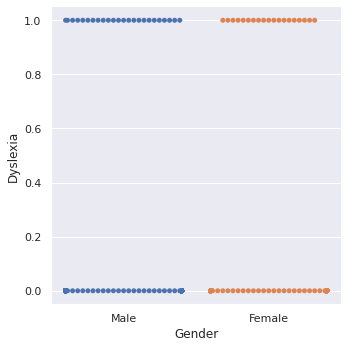

In [ ]:
sns.catplot(data=data_dyslexia, x="Gender", y="Dyslexia", hue="Gender", kind="swarm")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


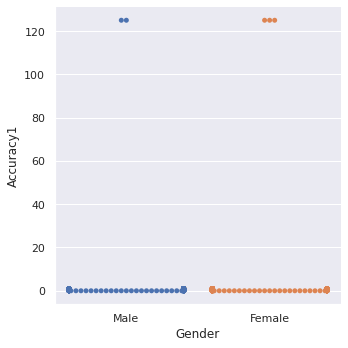

In [ ]:
sns.catplot(data=data_dyslexia, x="Gender", y="Accuracy1", hue="Gender", kind="swarm")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


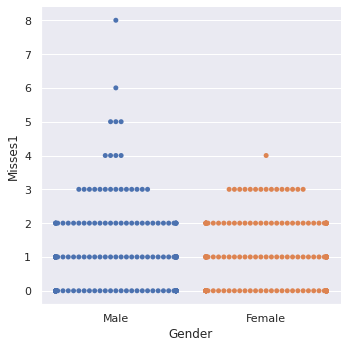

In [ ]:
sns.catplot(data=data_dyslexia, x="Gender", y="Misses1", hue="Gender", kind="swarm")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


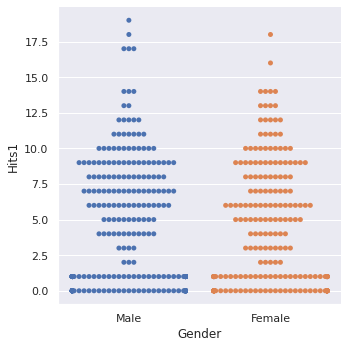

In [ ]:
sns.catplot(data=data_dyslexia, x="Gender", y="Hits1", hue="Gender", kind="swarm")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


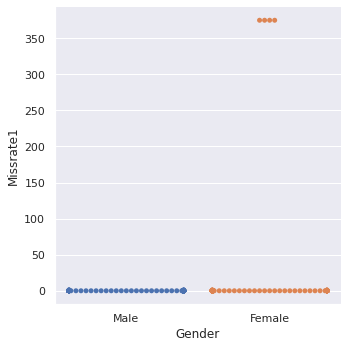

In [ ]:
sns.catplot(data=data_dyslexia, x="Gender", y="Missrate1", hue="Gender", kind="swarm")

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


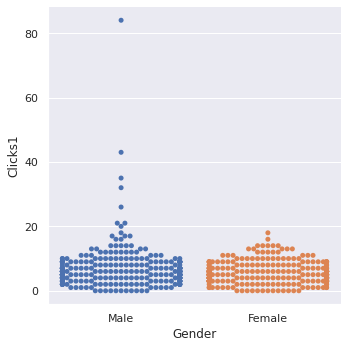

In [ ]:
sns.catplot(data=data_dyslexia, x="Gender", y="Clicks1", hue="Gender", kind="swarm")

In [ ]:
# Code Here (Add as many cells as you need)
data_dyslexia1 = sample_dyslexia.copy()
data_dyslexia1['Gender']=data_dyslexia1.Gender.map({'Male': 1, 'Female': 0})
data_dyslexia1['Dyslexia']=data_dyslexia1.Dyslexia.map({'No': 0, 'Yes': 1})
data_dyslexia1['Nativelang']=data_dyslexia1.Nativelang.map({'No': 0, 'Yes': 1})
data_dyslexia1['Otherlang']=data_dyslexia1.Otherlang.map({'No': 0, 'Yes': 1})
data_dyslexia1

Gender  Nativelang  Otherlang   Age  Clicks1  Hits1  Misses1  Score1  \
898        1           1          1  10.0      5.0    1.0      1.0     1.0   
2183       0           0          1  12.0      5.0    0.0      2.0     0.0   
2491       0           0          1  13.0      3.0    1.0      0.0     2.0   
432        1           1          1  10.0      7.0    7.0      0.0     7.0   
2223       1           0          0  14.0      5.0    1.0      1.0     1.0   
...      ...         ...        ...   ...      ...    ...      ...     ...   
3232       0           0          1   7.0      8.0    0.0      3.0     0.0   
3532       1           0          1  11.0      9.0    9.0      0.0     9.0   
1767       0           0          1  10.0      5.0    0.0      2.0     0.0   
1284       1           0          1  10.0      2.0    1.0      0.0     1.0   
703        1           1          0  11.0      3.0    1.0      0.0     1.0   

      Accuracy1  Missrate1  ...  Score31  Accuracy31  Missrate31  Clicks32  \
898    0.200000        0.2  ...      4.0    0.114286    0.000000      16.0   
2183   0.000000        0.4  ...      4.0    0.035088    0.052632      17.0   
2491   0.333333        0.0  ...      4.0    0.114286    0.000000      17.0   
432    1.000000        0.0  ...      4.0    0.114286    0.000000      26.0   
2223   0.200000        0.2  ...      3.0    0.049180    0.081967      17.0   
...         ...        ...  ...      ...         ...         ...       ...   
3232   0.000000      375.0  ...      1.0    0.045455    0.000000      11.0   
3532   1.000000        0.0  ...      2.0    0.051282    0.051282      26.0   
1767   0.000000        0.4  ...      3.0    0.083333    0.027778      17.0   
1284   0.500000        0.0  ...      3.0    0.085714    0.028571      17.0   
703    0.333333        0.0  ...      2.0    0.050000    0.050000      17.0   

      Hits32  Misses32  Score32  Accuracy32  Missrate32  Dyslexia  
898      2.0       1.0      2.0  125.000000    0.062500         0  
2183     1.0       3.0      1.0    0.058824    0.176471         0  
2491     2.0       2.0      2.0    0.117647    0.117647         0  
432      4.0       0.0      4.0    0.153846    0.000000         0  
2223     2.0       2.0      2.0    0.117647    0.117647         0  
...      ...       ...      ...         ...         ...       ...  
3232     0.0       2.0      0.0    0.000000    0.181818         0  
3532     4.0       0.0      4.0    0.153846    0.000000         0  
1767     2.0       2.0      2.0    0.117647    0.117647         0  
1284     1.0       3.0      1.0    0.058824    0.176471         0  
703      0.0       4.0      0.0    0.000000    0.235294         0  

[547 rows x 197 columns]

In [ ]:
from sklearn.model_selection import train_test_split
# Select the features and the target
data_dyslexia2 = data_dyslexia1.copy()

X = data_dyslexia2.drop("Dyslexia", axis =1)
y = data_dyslexia2["Dyslexia"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

377     0
890     0
3622    1
2673    0
394     1
       ..
3615    0
1905    0
1350    1
681     0
2091    0
Name: Dyslexia, Length: 110, dtype: int64

### **Write Here**

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

In [ ]:
lo = LogisticRegression(random_state=42)

# Train the model on the training data
lo.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lo.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)
# Calculate the R squared value
r2_Logistic = r2_score(y_test, y_pred)
mae_logistic = mean_absolute_error(y_test, y_pred)
mse_logistic = mean_squared_error(y_test, y_pred)

80.9090909090909


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
sv = SVC()

# Train the classifier on the training data
sv.fit(X_train, y_train)

# Test the classifier on the test data
y_pred = sv.predict(X_test)

# Evaluate the classifier's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)
r2_SVC= r2_score(y_test, y_pred)
mae_SVC = mean_absolute_error(y_test, y_pred)
mse_SVC = mean_squared_error(y_test, y_pred)

89.0909090909091


### **Write Here**

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models. (Add as many cells as you need)

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

In [ ]:
# Code Here (Add as many cells as you need)
print(r2_Logistic)

print(r2_SVC)

print(mae_logistic)

print(mae_SVC)

print(mse_logistic)

print(mse_SVC)



-1.006344171292624
-0.13402061855670055
0.20909090909090908
0.11818181818181818
0.20909090909090908
0.11818181818181818


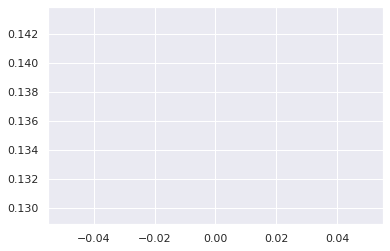

In [ ]:
plt.plot(mae_logistic)
plt.show()

### **Write Here**